### 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import time
from datetime import datetime
import itertools
from itertools import combinations_with_replacement
import os
import ast
from PIL import Image
import gif
from matplotlib.ticker import FormatStrFormatter

c:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from importlib.metadata import version
version('gif')

'3.0.0'

### 1. Definindo cenários

#### 1.1. Define 3 matrizes para problema

##### Matriz Extra Simples

In [3]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

##### Matriz Simples

In [4]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

##### Matriz Média

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

##### Matriz Complexa

In [6]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

#### 1.2. Plota Matrizes

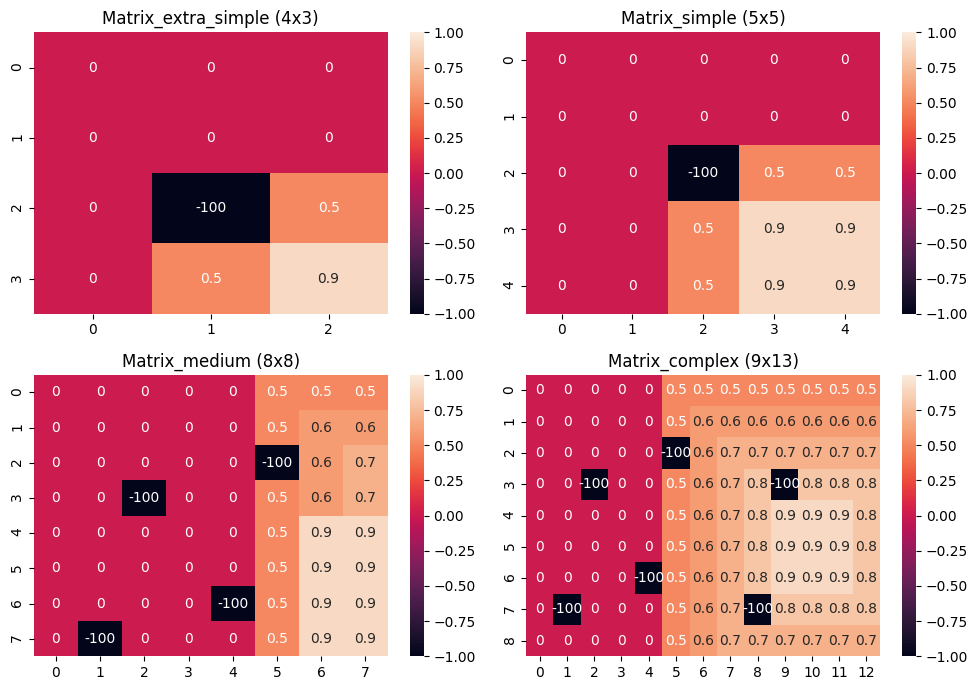

In [7]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Assign heatmaps to each subplot using sns.heatmap
sns.heatmap(matrix_extra_simple, ax=axs[0, 0], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_simple, ax=axs[0, 1], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_medium, ax=axs[1, 0], vmin=-1, vmax=1, annot=True, fmt='g')
sns.heatmap(matrix_complex, ax=axs[1, 1], vmin=-1, vmax=1, annot=True, fmt='g')

# Set titles for each subplot
axs[0, 0].set_title('Matrix_extra_simple (4x3)')
axs[0, 1].set_title('Matrix_simple (5x5)')
axs[1, 0].set_title('Matrix_medium (8x8)')
axs[1, 1].set_title('Matrix_complex (9x13)')

# Modify the colorbar ticks
# cbar = ax.collections[0].colorbar
# cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## 2. Importando Arquivos com Resultado

#### 2.1. Extrai informação dos resultados obtidos

In [8]:
# Lê arquivos de resultado de modelos Q Learning
def read_results(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_results = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_results[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='results', index_col=False)
            print('donne with: ', name)

    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_results.keys()]

    return dfs_results

#### 2.2. Extrai informação dos parametros utilizados

In [9]:
# Lê arquivos de parametros de modelos Q Learning
def read_parameters(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_parameters = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_parameters[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='parameters', index_col=False)
            print('donne with: ', name)
    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_parameters.keys()]

    return dfs_parameters

### 3. Analisando Resultados

#### 3.1. Análise Gráfica

##### 3.1.1 Gráficos de d_f por round

Para cada cenário, podemos ter um d_f ideal, visto na quantidade media de passos ate conclusao do jogo em cada cenário

In [10]:
# Cria tabela com d_f em função da quantidade de passos

d_f_08_list = []
d_f_09_list = []
d_f_095_list = []
d_f_099_list = []
d_f_0999_list = []
d_f_09999_list = []
rounds = []

for i in np.arange(0,10000,1):
    rounds.append(i)
    d_f_08_list.append(0.8**i)
    d_f_09_list.append(0.9**i)
    d_f_095_list.append(0.95**i)
    d_f_099_list.append(0.99**i)
    d_f_0999_list.append(0.999**i)
    d_f_09999_list.append(0.9999**i)

df_res_d_f = pd.DataFrame()
df_res_d_f['rounds'] = rounds
df_res_d_f['08 rate'] = d_f_08_list
df_res_d_f['09 rate'] = d_f_09_list
df_res_d_f['095 rate'] = d_f_095_list
df_res_d_f['099 rate'] = d_f_099_list
df_res_d_f['0999 rate'] = d_f_0999_list
df_res_d_f['09999 rate'] = d_f_09999_list

dfm = df_res_d_f.melt('rounds', var_name='cols', value_name='d_f rate')

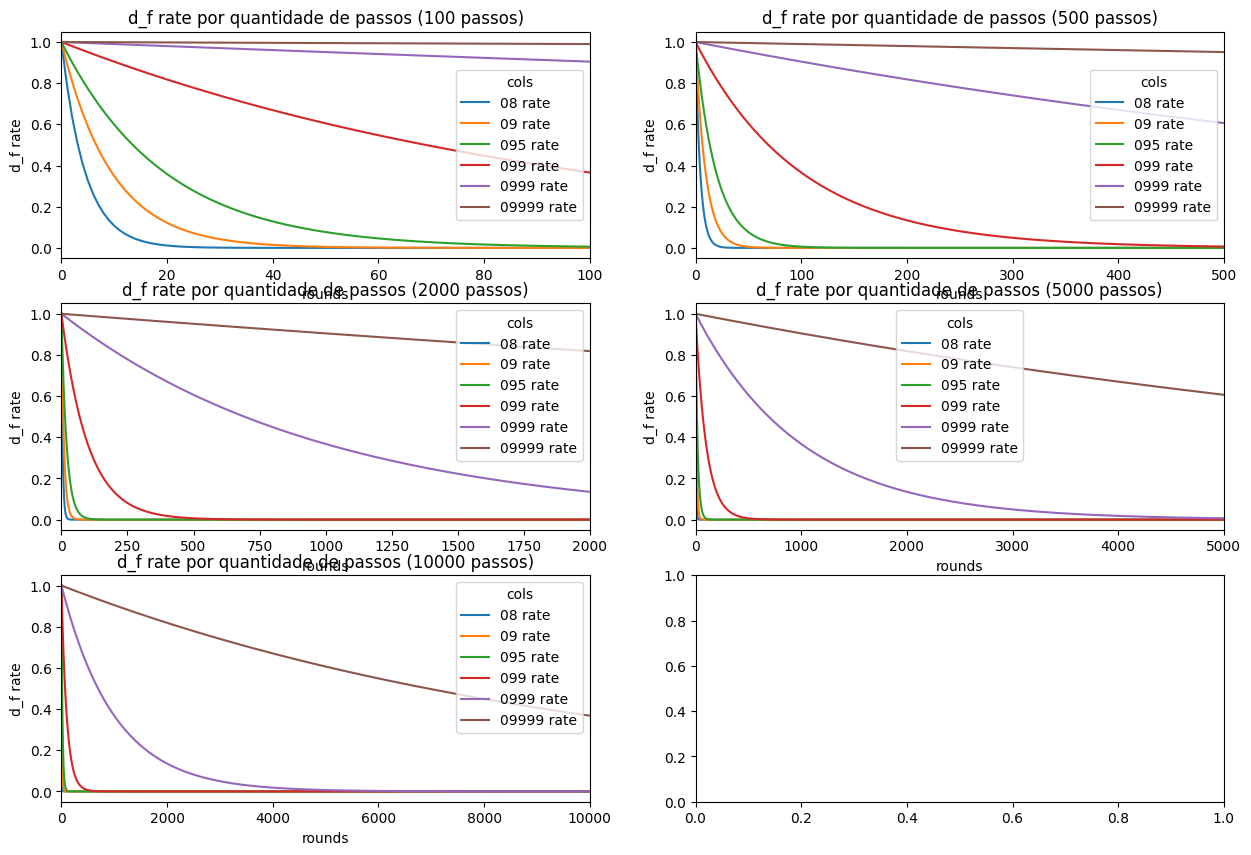

In [13]:
# Create a figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[0, 0]
)
axs[0, 0].set_xlim(0, 100)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[0, 1]
)
axs[0, 1].set_xlim(0, 500)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[1, 0]
)
axs[1, 0].set_xlim(0, 2000)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[1, 1]
)
axs[1, 1].set_xlim(0, 5000)

sns.lineplot(
    data=dfm,
    x="rounds", y="d_f rate", hue="cols",
    markers=True, dashes=False, ax=axs[2, 0]
)
axs[2, 0].set_xlim(0, 10000)

# Set titles for each subplot
axs[0, 0].set_title('d_f rate por quantidade de passos (100 passos)')
axs[0, 1].set_title('d_f rate por quantidade de passos (500 passos)')
axs[1, 0].set_title('d_f rate por quantidade de passos (2000 passos)')
axs[1, 1].set_title('d_f rate por quantidade de passos (5000 passos)')
axs[2, 0].set_title('d_f rate por quantidade de passos (10000 passos)')

plt.show()

##### 3.1.2 Gráficos Épsilon por episódio

Como para todos os cenários iremos realizar o treinamento em 8.000 episodios, é necessário definir qual o melhor decay rate para que sejam obtidos cenários de exploração e exploitação de forma equilibrada

In [14]:
# Cria tabela com diferentes cenários de decaimento da variavel de exploração (Epsilon)

decay_rate_01_list = []
decay_rate_005_list = []
decay_rate_001_list = []
decay_rate_0005_list =[]
episodes = []

for i in np.arange(0,8000,1):
    episodes.append(i)
    decay_rate_01_list.append(0.001 + (1 - 0.01)*np.exp(-0.01*i))
    decay_rate_005_list.append(0.001 + (1 - 0.01)*np.exp(-0.005*i))
    decay_rate_001_list.append(0.001 + (1 - 0.01)*np.exp(-0.001*i))
    decay_rate_0005_list.append(0.001 + (1 - 0.01)*np.exp(-0.0005*i))

df_res_exploration = pd.DataFrame()
df_res_exploration['episodes'] = episodes
df_res_exploration['01 decay rate'] = decay_rate_01_list
df_res_exploration['005 decay rate'] = decay_rate_005_list
df_res_exploration['001 decay rate'] = decay_rate_001_list
df_res_exploration['0005 decay rate'] = decay_rate_0005_list

dfm = df_res_exploration.melt('episodes', var_name='cols', value_name='decay rate')

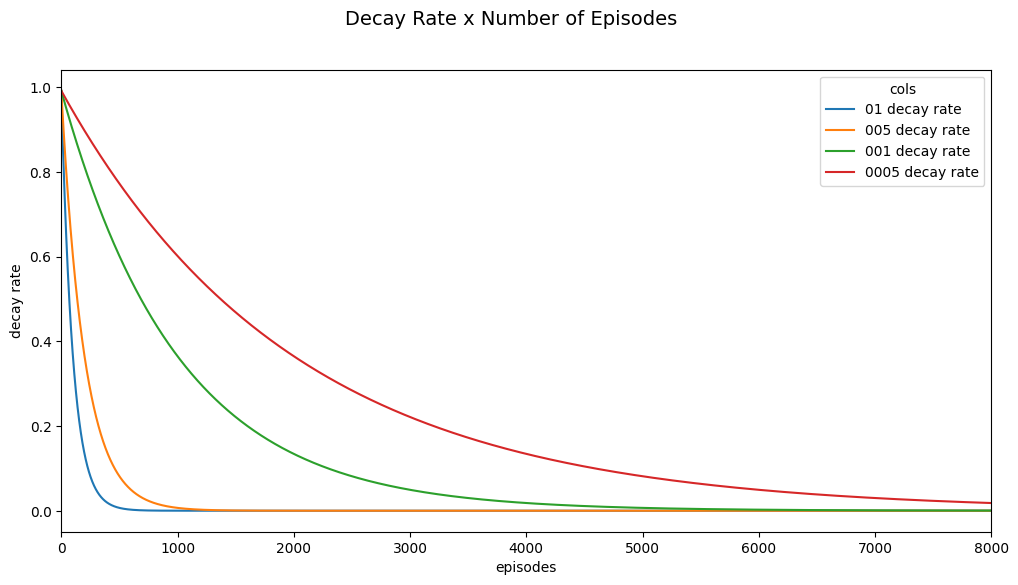

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=dfm,
    x="episodes", y="decay rate", hue="cols",
    markers=True, dashes=False
)

fig.suptitle('Decay Rate x Number of Episodes', fontsize=14)

plt.xlim([0, 8000])
plt.show()

#### 3.2. Declarando Funções úteis

##### 3.2.1. Cria dataframe de sumário de resultados obtidos

In [16]:
# Cria dataframe de sumário de resultados obtidos

def create_summary_df(dfs_results, dfs_parameters):
    # Cria listas vazias
    best_results_matrix_simple_filename = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_last_reward = []
    best_results_matrix_simple_max_reward_time = []
    best_results_matrix_simple_last_reward_time = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_lr = []
    best_results_matrix_simple_gamma = []
    best_results_matrix_simple_d_f = []
    best_results_matrix_simple_exp_rate = []
    best_results_matrix_simple_max_exp_rate = []
    best_results_matrix_simple_min_exp_rate = []
    best_results_matrix_simple_decay_rate = []
    best_results_matrix_simple_rounds = []
    best_results_matrix_simple_max_time_steps = []
    best_results_matrix_simple_last_time_steps = []
    best_results_matrix_simple_steps = []
    best_results_matrix_simple_avg_reward =[]
    best_results_matrix_simple_avg_reward_time = []
    best_results_matrix_simple_avg_time_steps = []
    best_results_matrix_simple_total_time =[]
    i=0

    for key in dfs_results.keys():
        
        df_param_temp = dfs_parameters[list(dfs_results.keys())[i]]
        df_results_temp = dfs_results[list(dfs_results.keys())[i]]

        # Apenda Nome do arquivo
        best_results_matrix_simple_filename.append(key)

        # Apenda Melhor resultado de recompensa acumulada
        best_results_matrix_simple_max_reward.append(max(df_results_temp['TOTAL REWARDS']))

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_last_reward.append(df_results_temp['TOTAL REWARDS'].iloc[-1])

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_avg_reward.append(np.mean(df_results_temp['TOTAL REWARDS']))

        # Tempo referente ao melhor resultado
        best_results_matrix_simple_max_reward_time.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIME']))

        # Tempo total
        best_results_matrix_simple_total_time.append(np.sum(df_results_temp['TIME'])/3600)

        # Último tempo obtido após treinamento
        best_results_matrix_simple_last_reward_time.append(df_results_temp['TIME'].iloc[-1])

        # Último tempo obtido após treinamento
        best_results_matrix_simple_avg_reward_time.append(np.mean(df_results_temp['TIME']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_max_time_steps.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIMESTEPS']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_avg_time_steps.append(np.mean(df_results_temp['TIMESTEPS']))

        # Último TIMESTEPS obtido após treinamento
        best_results_matrix_simple_last_time_steps.append(df_results_temp['TIMESTEPS'].iloc[-1])

        # Apenda learning rate
        best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))

        # Apenda gamma
        best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))

        # Apenda d_f
        best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))

        # Apenda exp_rate
        best_results_matrix_simple_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='exp_rate']['parameter']))

        # Apenda max_exp_rate
        best_results_matrix_simple_max_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='max_exp_rate']['parameter']))

        # Apenda min_exp_rate
        best_results_matrix_simple_min_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='min_exp_rate']['parameter']))

        # Apenda decay_rate
        best_results_matrix_simple_decay_rate.append(float(df_param_temp[df_param_temp['parameter name']=='decay_rate']['parameter']))

        # Apenda rounds
        best_results_matrix_simple_rounds.append(float(df_param_temp[df_param_temp['parameter name']=='rounds']['parameter']))

        # Apenda steps
        best_results_matrix_simple_steps.append(float(df_param_temp[df_param_temp['parameter name']=='steps']['parameter']))

        i+=1

    # Cria dataframe com principais indicadores e parametros
    df_final_results = pd.DataFrame({'FILE NAME' : best_results_matrix_simple_filename,
                                     'TOTAL TIME' : best_results_matrix_simple_total_time,
                                    'MAX REWARD' : best_results_matrix_simple_max_reward,
                                    'LAST REWARD' : best_results_matrix_simple_last_reward,
                                    'AVG REWARD' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIME' : best_results_matrix_simple_max_reward_time,
                                    'LAST REWARD TIME' : best_results_matrix_simple_last_reward_time,
                                    'AVG REWARD TIME' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIMESTEPS' : best_results_matrix_simple_max_time_steps,
                                    'LAST REWARD TIMESTEPS' : best_results_matrix_simple_last_time_steps,
                                    'AVG REWARD TIMESTEPS' : best_results_matrix_simple_avg_time_steps,
                                    'lr' : best_results_matrix_simple_lr,
                                    'gamma' : best_results_matrix_simple_gamma,
                                    'd_f' : best_results_matrix_simple_d_f,
                                    'exp_rate' : best_results_matrix_simple_exp_rate,
                                    'max_exp_rate' : best_results_matrix_simple_max_exp_rate,
                                    'min_exp_rate' : best_results_matrix_simple_min_exp_rate,
                                    'decay_rate' : best_results_matrix_simple_decay_rate,
                                    'rounds' : best_results_matrix_simple_rounds,
                                    'steps' : best_results_matrix_simple_steps})
    
    return df_final_results


##### 3.2.2. Cria funções para filtrar tabelas e plotagem de gráficos

In [17]:
# Filtra dataframe de acordo com a dimensão da matriz estudada

def filter_df(df, matrix_dim):
    df_final_results_filtered = df[df['FILE NAME'].isin(list(filter(lambda k: matrix_dim in k, df['FILE NAME'])))]
    return df_final_results_filtered

In [18]:
# Função que recebe lista com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward)

def plot_episodes(dfs_names_list, variable, dfs_results):
    # Seleciona apenas dfs da lista
    dfs_searched=[]
    for df_names in dfs_names_list:
        dfs_searched.append(dfs_results[df_names])

    # Concatena dfs
    dfs_concat = pd.concat(dfs_searched)

    # Calculate mean of 'x' column for each index
    mean_variable_by_episode = pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index()

    # Estabelece limite inferior e superior
    ci1 = 1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list))

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))

    fig1 = ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label="Média por Conf")
    fig1 = ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci1), (mean_variable_by_episode[variable]+ci1), color='b', alpha=.1)

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')

    plt.show()

In [19]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva no mesmo gráfico

def plot_episodes_multi(dfs_names_list_of_lists, variable, dfs_results):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))
    for mean_variable_by_episode in mean_variable_by_episode_total:
        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        
        i+=1

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [20]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva em subplots

def plot_episodes_multi_subplots(dfs_names_list_of_lists, title_list, variable, dfs_results, range_y, range_x=False, vertical_lines=False):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(len(mean_variable_by_episode_total), figsize=(15, 10), sharex=True)

    for i, mean_variable_by_episode in enumerate(mean_variable_by_episode_total):

        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax[i].plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax[i].fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        ax[i].set_title(f'Média {variable} por Episódio')
        ax[i].set_ylabel(variable)
        if range_x!= False:
            ax[i].set_xlim(range_x)
        ax[i].set_ylim(range_y)
        if vertical_lines!= False:
        # Add vertical line
            ax[i].axvline(x=vertical_lines[i], color='red', linestyle='--')
        i+=1

    for i, title in enumerate(title_list):
        ax[i].set_title(title, fontsize=10)
    # ax.legend(loc='upper right')

    #plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [21]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva em subplots

def plot_means(dfs_names_list_of_lists, variable, dfs_results, x, episode_limit):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    mean_lst = []
    confidence_intervals_lst = []

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(10, 5))

    for mean_variable_by_episode in mean_variable_by_episode_total:
        df=mean_variable_by_episode[mean_variable_by_episode['JOGO']>=episode_limit]
        
        mean_lst.append(np.mean(df[variable]))
        confidence_intervals_lst.append(np.mean(1.96 * df[variable]/np.sqrt(len(dfs_names_list))))

    # Plotting the bar plot with confidence intervals
    plt.bar(x, mean_lst, tick_label=x, alpha=0.5, yerr=confidence_intervals_lst, capsize=5)

    plt.title(f'Média de {variable} por Configuração (episódios acima de {episode_limit})')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [22]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva em subplots

def plot_mean_time(df_summary, variable):
    df = pd.DataFrame(df_summary.groupby(variable)['TOTAL TIME'].mean()).reset_index()
    df[variable]=df[variable].astype(str)

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plotting the bar plot with confidence intervals
    plt.bar(df[variable], df['TOTAL TIME'], alpha=0.5, capsize=5)

    plt.title(f'Média de Tempo de Execução por {variable}')

    plt.ylabel('TOTAL TIME')

    plt.xlabel(variable)
    
    plt.show()

##### 3.2.3. Cria classes para jogar soluções obtidas e retornar melhores caminhos

In [23]:
class Play:
    # Inicializa estado do jogo
    def __init__(self, matrix_game, vtable, d_f, start = (0, 0)):

        # Define fator de perda temporal 
        self.d_f = d_f

        # Rewards (sem fator temporal)
        self.rewards_d_f=[]

        # Rewards (com fator temporal)
        self.rewards=[]

        # Define matriz de função de valor
        self.vtable = vtable

        # Define posição inicial
        self.start = (0, 0)

        # Define vetor de estados percorridos
        self.states = [self.start]

        # Define estado inicial como start
        self.state = start

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

         # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Verifica se jogo terminou
    def isEndFunc(self):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.state not in self.states[:-1]) and (self.ini_reward_matrix[self.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action, state):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (state[0] - 1, state[1])
        elif action == "down":
            nxtState = (state[0] + 1, state[1])
        elif action == "left":
            nxtState = (state[0], state[1] - 1)
        else:
            nxtState = (state[0], state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, retorna 'MOVE NOT ALLOWED'
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                        return nxtState
        return 'MOVE NOT ALLOWED'
    
    # Escolhe quais caminhos legais serão avaliados 
    def legal_paths(self):
        temp_state = self.state
        legal_paths_lst = []
        i=1
        # realiza permutação de ações e avalia cada estado final como valido ou nao valido
        while i>0:
            paths = combinations_with_replacement(['up', 'down', 'left', 'right'], i)
            # Avalia cada caminho
            for path in paths:
                temp_state = self.state
                # Avalia cada movimento dentro de cada caminho e apenda em legal_paths_lst caminhos legais disponíveis
                for move in path:
                    temp_state = self.nxtPosition(move, temp_state)
                    if temp_state != 'MOVE NOT ALLOWED':
                        continue
                    else:
                        break
                # Apenda movimentos legais em lista
                if temp_state != 'MOVE NOT ALLOWED' and (temp_state not in self.states and float(self.vtable.loc[temp_state])!=0):
                    legal_paths_lst.append(path)
            i=i+1
            if len(legal_paths_lst)>0:
                break
        print('legal paths: ', legal_paths_lst)
        return legal_paths_lst
    
    # Escolhe caminho com maior recompensa
    def choose_path(self, legal_paths_lst):
        temp_state = self.state
        reward=0
        for path in legal_paths_lst:
            temp_state = self.state
            for move in path:
                 temp_state = self.nxtPosition(move, temp_state)
            nxt_reward = float(self.vtable.loc[temp_state])
            if temp_state in self.states:
                nxt_reward = 0
            if nxt_reward > reward:
                reward = nxt_reward
                final_path = path
        return final_path
    
    #def save_images(self):
        # Salva imagens
    # Joga de acordo com matriz de fução de valor associada
    def play_game(self):
        # Joga enquando jogo não terminou
        while self.isEnd==False:
            # Escolhe caminho a ser tomado
            final_path = self.choose_path(self.legal_paths())
            print('move taken: ',final_path)

            # Para cada movimento de cada caminho, agente se movimenta e appenda em listas
            for move in final_path:
                # Atualiza estado para proxima posição
                self.state = self.nxtPosition(move, self.state)

                # Apenda estado atual em vetor de estados
                self.states.append(self.state)

                # Apenda recompensa associada ao estado atual
                self.rewards.append(float(self.ini_reward_matrix[self.state]))

                # Apenda recompensa com fator temporal associada ao estado atual
                self.rewards_d_f.append(float(self.ini_reward_matrix[self.state]*(self.d_f**(len(self.states)-1))))

                # Verifica se jogo terminou
                self.isEndFunc()
                
                # Printa listas
                print('estados percorridos: ',self.states)
                print ('recompensas: ', self.rewards)
                print ('recompensas com fator temporal: ', self.rewards_d_f)
                #self.save_images(self.states)
            
        return self.states

# DEBUGAR
# if __name__ == "__main__":
#     game = Play(matrix_game = matrix_extra_simple,
#                 vtable = vtable,
#                 start = (0, 0),
#                 d_f = 0.95
#                 )
#     game.play_game()

##### 3.2.4. Cria função para criar gif com caminho realizado

In [103]:
def create_gif(matrix, states_lst, duration, title):
    # Set the directory path to your folder of XLSX files
    folder_path = "Resultado_RL_Q_Learning/04_Imagens Temp/"

    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Iterate over each file and delete them
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Ensure it's a file (not a subdirectory)
            os.remove(file_path)

    gif.options.matplotlib["dpi"] = 300
    plt.rcParams["axes.grid"] = False

    i=0
    for estado in states_lst:

        fig, ax = plt.subplots()

        plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)

        plt.text(estado[1], estado[0], 'A', color='black', fontsize=12, ha='center', va='center')
        if i>0:
            j=1
            for j in np.arange(0,i,1):
                plt.text(states_lst[j][1], states_lst[j][0], j, color='black', fontsize=12, ha='center', va='center')
        
        # Show the grid lines in grey
        ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
        ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
        ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
        plt.xticks(np.arange(0, matrix.shape[1],1))
        plt.yticks(np.arange(0, matrix.shape[0],1))
        plt.title(title)
        # Salva Figura
        plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i}.png')

        if i==len(states_lst)-1:
            fig, ax = plt.subplots()
            plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)
            j=1
            for j in np.arange(0,i+1,1):
                plt.text(states_lst[j][1], states_lst[j][0], j, color='black', fontsize=12, ha='center', va='center')

            # Show the grid lines in grey
            ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
            ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
            ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
            plt.xticks(np.arange(0, matrix.shape[1],1))
            plt.yticks(np.arange(0, matrix.shape[0],1))
            plt.title(title)

            # Salva Figura
            plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i+1}.png')
        # Aumenta contador
        i=i+1

    # Create an empty dictionary to store the DataFrames
    image_list = []

    # Loop through all files in the directory
    for filename in sorted(os.listdir(folder_path)):
        for k in np.arange(0,i+1,1):
            if filename.endswith(f'_{k}.png'):
                # Add images to the list
                image = Image.open(folder_path+filename)
                image_list.append(image)

    date_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    gif.save(image_list, f"Resultado_RL_Q_Learning/05_Gifs Temp/vtable_dim_{matrix.shape[0]}x{matrix.shape[1]}_{date_time}.gif", 
            duration=duration, unit="s", 
            between="startend")

#### 3.3. Análise Gráfica do d_f para cada configuração

##### 3.3.1. Resultado matrix_extra_simple (4x3)

In [23]:
# Leitura de soluções e sumarização

dfs_results_4x3 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
dfs_param_4x3 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
df_summary_4x3 = create_summary_df(dfs_results_4x3, dfs_param_4x3).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-31_16-20-18
donne with:  results_q_learn_dim_4x3_2023-05-31_15-37-43
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_dim_4x3_2023-05-31_19-00-44
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-31_16-33-57
donne with:  results_q_learn_dim_4x3_2023-05-31_15-59-24
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-31_16-56-12
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_17-28-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_18-40-18
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_di

In [44]:
df_summary_4x3

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
54,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
50,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
36,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
6,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
51,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
25,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
19,results_q_learn_dim_4x3_2023-05-31_14-20-49,1.250235,1.250235,1.102893,0.050521,0.081961,1.102893,7,7,19.612375,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
34,results_q_learn_dim_4x3_2023-05-31_15-15-13,1.250235,1.250235,1.020999,0.051804,0.112038,1.020999,7,7,46.150750,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


In [58]:
df_summary_4x3['d_f'].value_counts().sort_index()

0.8000     8
0.9000    12
0.9500    10
0.9900    10
0.9990    10
0.9999    10
Name: d_f, dtype: int64

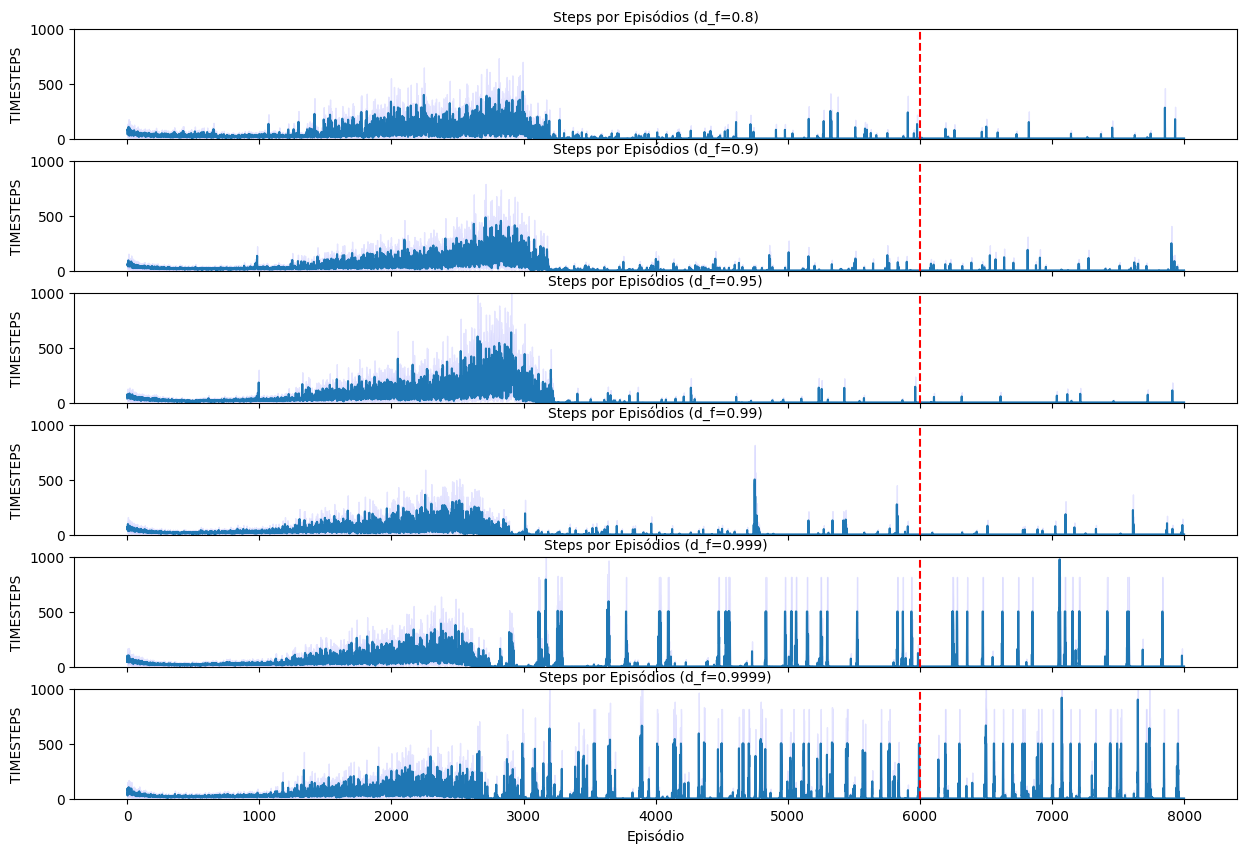

In [127]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_4x3['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_4x3,
                     range_y=[0,1000],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

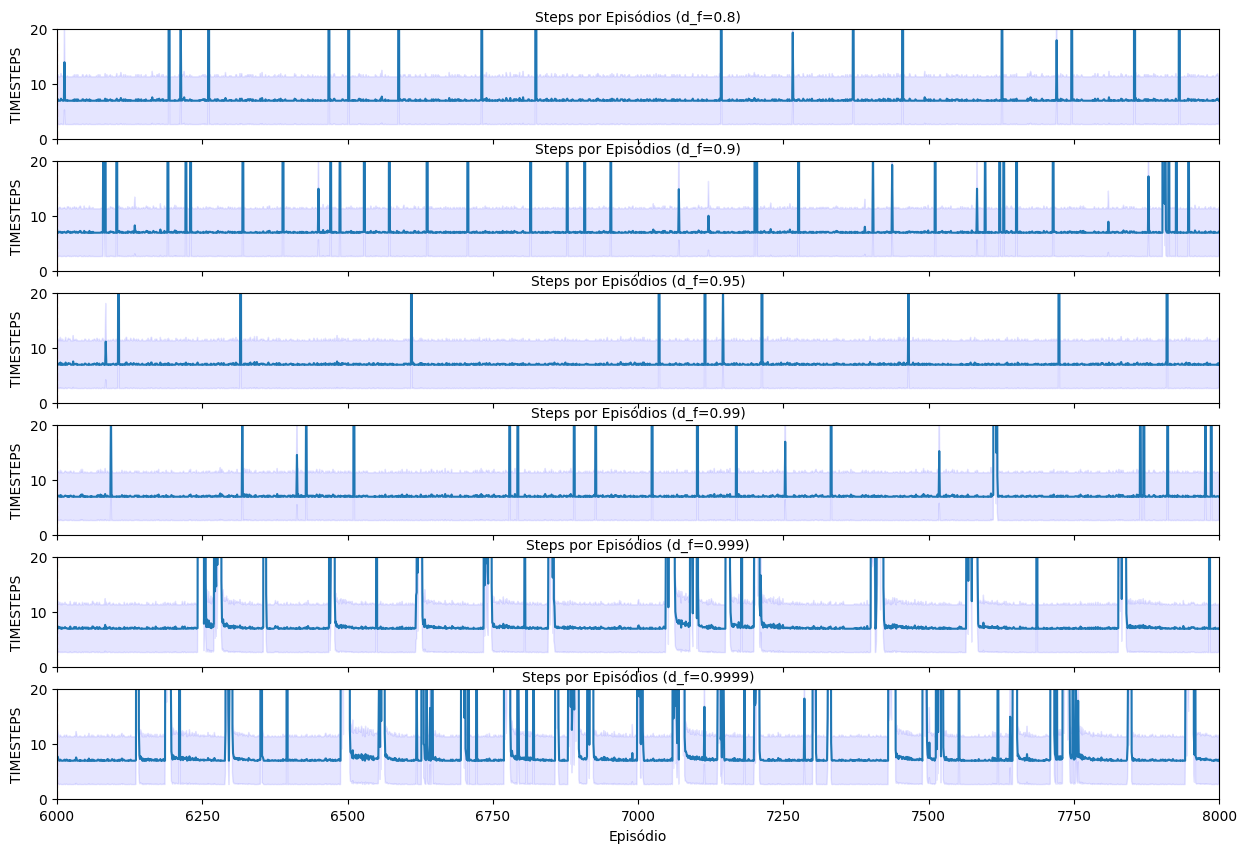

In [130]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_4x3['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_4x3,
                     range_x=[6000,8000],
                     range_y=[0,20],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

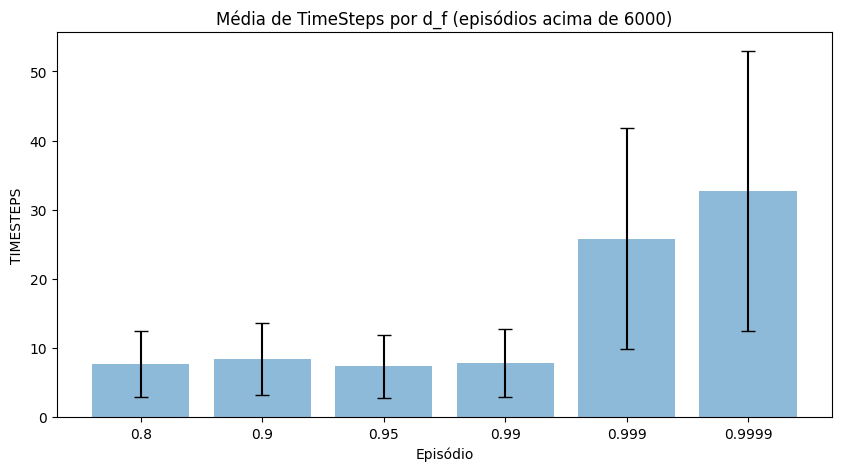

In [131]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
            df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
            df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_4x3['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_4x3,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 6000
            )

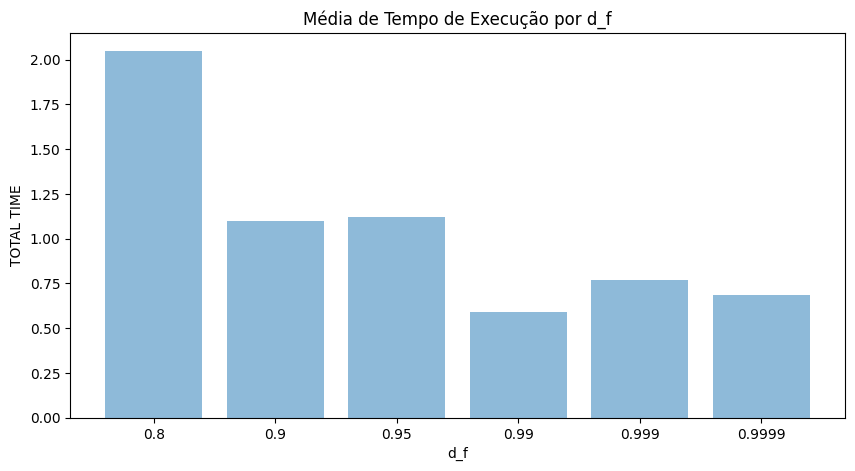

In [31]:
plot_mean_time(df_summary_4x3, 'd_f')

Selecionado d_f=0.95, pois obteve melhor resultado para episódios acima de 6000 e com tempo de execução de ~1.1 horas.

##### 3.3.2. Resultado matrix_simple (5x5)

In [25]:
# Leitura de soluções e sumarização

dfs_results_5x5 = read_results('Resultado_RL_Q_Learning/01_Matriz Simple_5x5/00_Analise Best d_f')
dfs_param_5x5 = read_parameters('Resultado_RL_Q_Learning/01_Matriz Simple_5x5/00_Analise Best d_f')
df_summary_5x5 = create_summary_df(dfs_results_5x5, dfs_param_5x5).sort_values('d_f')

donne with:  results_q_learn_dim_5x5_2023-06-01_10-26-33
donne with:  results_q_learn_dim_5x5_2023-06-01_10-48-02
donne with:  results_q_learn_dim_5x5_2023-06-01_11-04-32
donne with:  results_q_learn_dim_5x5_2023-06-01_11-05-13
donne with:  results_q_learn_dim_5x5_2023-06-01_11-15-48
donne with:  results_q_learn_dim_5x5_2023-06-01_11-19-11
donne with:  results_q_learn_dim_5x5_2023-06-01_11-35-20
donne with:  results_q_learn_dim_5x5_2023-06-01_11-35-55
donne with:  results_q_learn_dim_5x5_2023-06-01_11-39-01
donne with:  results_q_learn_dim_5x5_2023-06-01_11-58-44
donne with:  results_q_learn_dim_5x5_2023-06-01_12-19-58
donne with:  results_q_learn_dim_5x5_2023-06-01_12-28-25
donne with:  results_q_learn_dim_5x5_2023-06-01_12-36-02
donne with:  results_q_learn_dim_5x5_2023-06-01_12-45-58
donne with:  results_q_learn_dim_5x5_2023-06-01_12-56-24
donne with:  results_q_learn_dim_5x5_2023-06-01_13-01-52
donne with:  results_q_learn_dim_5x5_2023-06-01_13-11-54
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:73: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [26]:
df_summary_5x5

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
59,results_q_learn_dim_5x5_2023-06-01_19-39-34,2.707309,1.161741,1.161741,0.904822,0.081383,0.114187,0.904822,13,13,113.301000,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
57,results_q_learn_dim_5x5_2023-06-01_19-19-42,2.370970,1.179223,1.161741,0.896515,0.255255,0.123522,0.896515,21,13,97.680000,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
56,results_q_learn_dim_5x5_2023-06-01_19-11-53,2.248739,1.182072,1.147019,0.870192,0.168482,0.101537,0.870192,17,13,94.021875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
55,results_q_learn_dim_5x5_2023-06-01_18-58-40,2.016415,1.218166,1.126952,0.877818,0.264272,0.193532,0.877818,16,14,83.566500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,14.0
54,results_q_learn_dim_5x5_2023-06-01_18-51-27,1.892539,1.197143,1.142414,0.905595,0.386844,0.149650,0.905595,30,13,78.057500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
53,results_q_learn_dim_5x5_2023-06-01_18-49-20,1.855600,1.223664,1.142414,0.872699,0.200006,0.159978,0.872699,15,13,77.494000,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
52,results_q_learn_dim_5x5_2023-06-01_18-44-24,1.771192,1.204337,1.147019,0.859039,0.170540,0.153712,0.859039,15,13,74.126125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
51,results_q_learn_dim_5x5_2023-06-01_18-36-53,1.645236,1.223664,1.142414,0.906355,0.266032,0.171916,0.906355,15,13,70.272375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
50,results_q_learn_dim_5x5_2023-06-01_18-30-51,1.544006,1.194441,1.118254,0.873651,0.210285,0.175071,0.873651,17,13,64.628375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0
58,results_q_learn_dim_5x5_2023-06-01_19-20-13,2.391731,1.204337,1.147019,0.862685,0.105054,0.172939,0.862685,15,13,100.682125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,13.0


In [27]:
df_summary_5x5['d_f'].value_counts().sort_index()

d_f
0.8000    10
0.9000    10
0.9500    10
0.9900    10
0.9990    10
0.9999    10
Name: count, dtype: int64

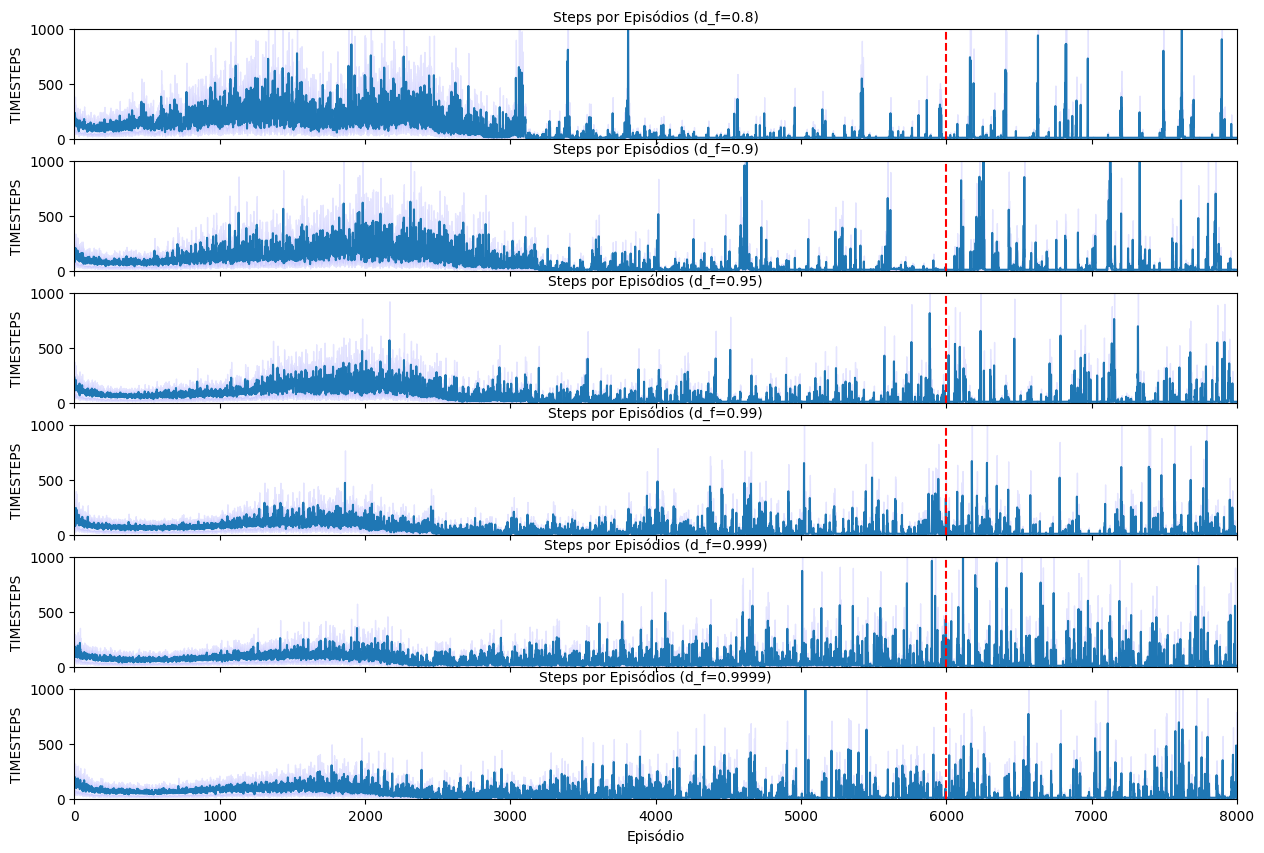

In [28]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_5x5['FILE NAME'][:10], # d_f = 0.8 Conf 0
                     df_summary_5x5['FILE NAME'][10:20], # d_f = 0.90 Conf 1
                     df_summary_5x5['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_5x5['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_5x5['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_5x5['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_5x5,
                     range_y=[0,1000],
                     range_x=[0,8000],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

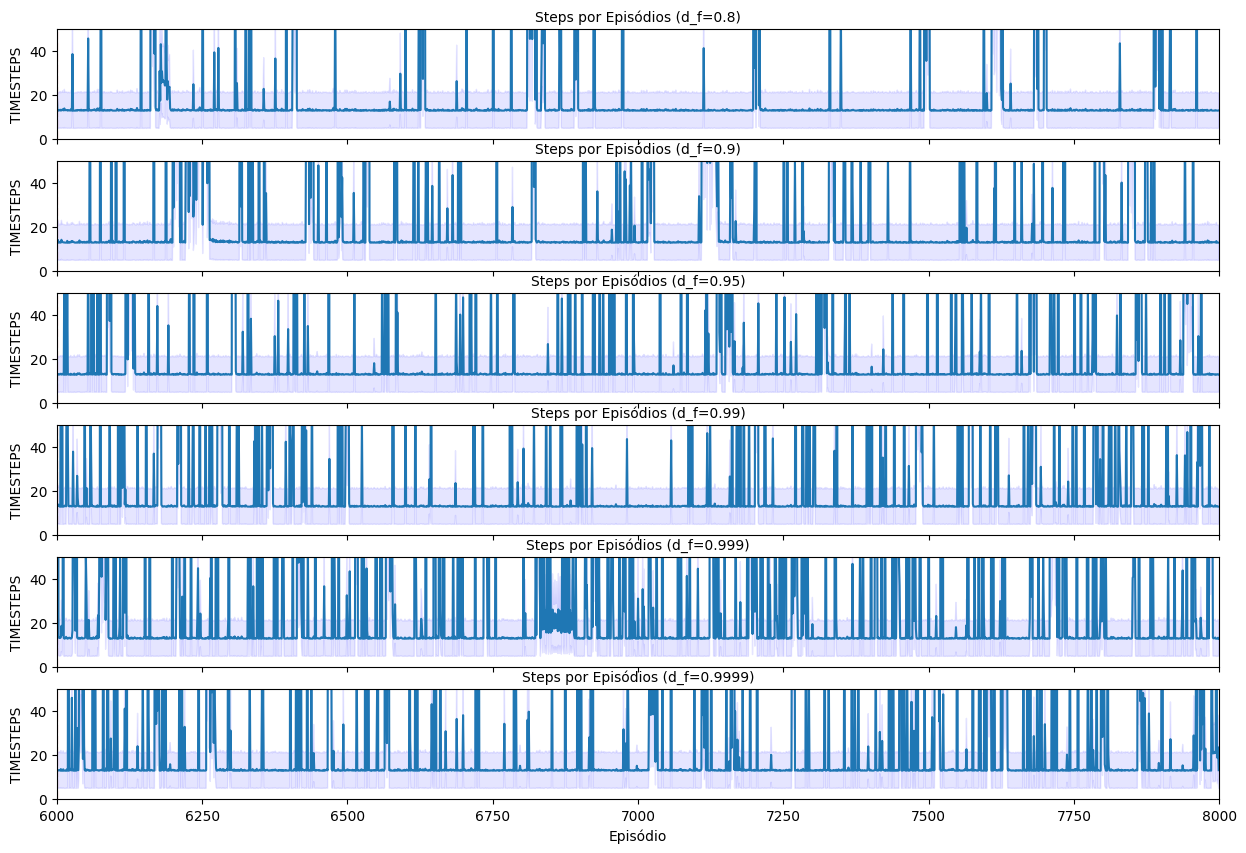

In [132]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_5x5['FILE NAME'][:10], # d_f = 0.8 Conf 0
                     df_summary_5x5['FILE NAME'][10:20], # d_f = 0.90 Conf 1
                     df_summary_5x5['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_5x5['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_5x5['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_5x5['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
                     ['Steps por Episódios (d_f=0.8)',
                      'Steps por Episódios (d_f=0.9)',
                      'Steps por Episódios (d_f=0.95)',
                      'Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_5x5,
                     range_y=[0,50],
                     range_x=[6000,8000],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

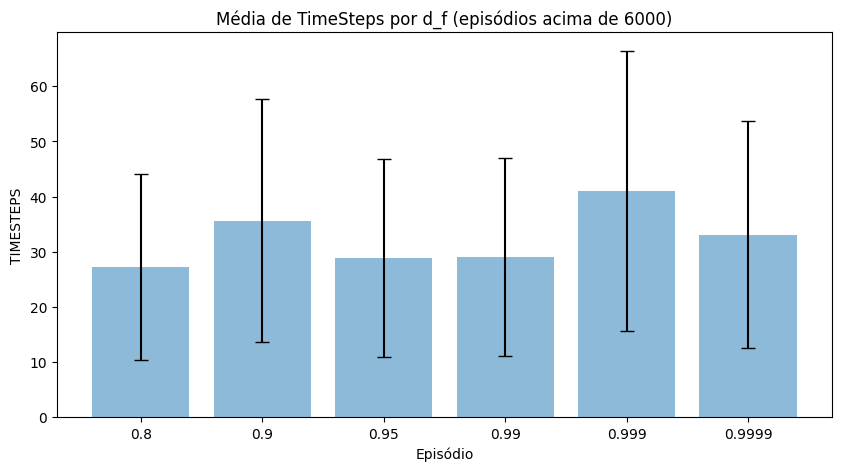

In [133]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([df_summary_5x5['FILE NAME'][:10], # d_f = 0.8 Conf 0
            df_summary_5x5['FILE NAME'][10:20], # d_f = 0.90 Conf 1
            df_summary_5x5['FILE NAME'][20:30], # d_f = 0.95 Conf 2
            df_summary_5x5['FILE NAME'][30:40], # d_f = 0.99 Conf 3
            df_summary_5x5['FILE NAME'][40:50], # d_f = 0.999 Conf 4
            df_summary_5x5['FILE NAME'][50:60]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_5x5,
            x=['0.8', '0.9', '0.95', '0.99', '0.999', '0.9999'],
            episode_limit = 6000
            )

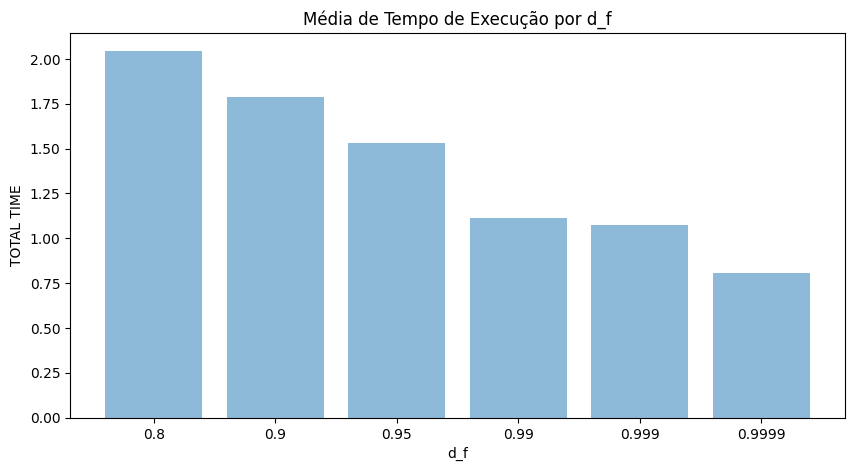

In [29]:
plot_mean_time(df_summary_5x5, 'd_f')

d_f=0.8 foi escolhido pois obteve melhor média para acima de 6.000 episódios, apesar do longo tempo de processamento de 2 horas.

#### 3.3.3. Resultado matrix_medium (8x8)

In [30]:
# Leitura de soluções e sumarização

dfs_results_8x8 = read_results('Resultado_RL_Q_Learning/02_Matriz Medium_8x8/00_Analise Best d_f')
dfs_param_8x8 = read_parameters('Resultado_RL_Q_Learning/02_Matriz Medium_8x8/00_Analise Best d_f')
df_summary_8x8 = create_summary_df(dfs_results_8x8, dfs_param_8x8).sort_values('d_f')

donne with:  results_q_learn_dim_8x8_2023-06-04_05-04-55
donne with:  results_q_learn_dim_8x8_2023-06-04_05-35-17
donne with:  results_q_learn_dim_8x8_2023-06-04_05-44-06
donne with:  results_q_learn_dim_8x8_2023-06-04_06-10-17
donne with:  results_q_learn_dim_8x8_2023-06-04_08-02-43
donne with:  results_q_learn_dim_8x8_2023-06-04_08-10-33
donne with:  results_q_learn_dim_8x8_2023-06-04_08-41-52
donne with:  results_q_learn_dim_8x8_2023-06-04_09-17-11
donne with:  results_q_learn_dim_8x8_2023-06-04_11-29-15
donne with:  results_q_learn_dim_8x8_2023-06-04_12-34-13
donne with:  results_q_learn_dim_8x8_2023-06-04_14-39-53
donne with:  results_q_learn_dim_8x8_2023-06-04_15-50-00
donne with:  results_q_learn_dim_8x8_2023-06-04_16-03-53
donne with:  results_q_learn_dim_8x8_2023-06-04_17-53-00
donne with:  results_q_learn_dim_8x8_2023-06-04_19-09-59
donne with:  results_q_learn_dim_8x8_2023-06-04_20-37-04
donne with:  results_q_learn_dim_8x8_2023-06-04_21-05-33
donne with:  results_q_learn_di

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:73: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

In [67]:
df_summary_8x8['d_f'].value_counts().sort_index()

0.9900    10
0.9990    10
0.9999     9
Name: d_f, dtype: int64

In [122]:
df_summary_8x8

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_8x8_2023-06-04_09-17-11,15.498707,13.352317,13.129391,9.841193,0.505924,0.373663,9.841193,37,29,661.096125,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
26,results_q_learn_dim_8x8_2023-06-04_08-10-33,14.394615,13.377852,13.182280,10.302197,0.317202,0.435519,10.302197,29,29,630.521250,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
2,results_q_learn_dim_8x8_2023-06-04_08-02-43,14.264261,13.373428,12.921503,9.969301,0.341275,0.385429,9.969301,29,30,615.724875,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,30.0
25,results_q_learn_dim_8x8_2023-06-04_05-04-55,11.302332,13.322682,13.129391,10.757473,0.333435,0.329140,10.757473,29,29,500.753500,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
4,results_q_learn_dim_8x8_2023-06-04_05-35-17,11.808651,13.329707,13.109717,11.213964,0.483577,0.307664,11.213964,35,29,514.919750,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
5,results_q_learn_dim_8x8_2023-06-04_05-44-06,11.956519,13.234839,13.077554,11.188986,0.442499,0.346988,11.188986,35,29,529.675625,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
22,results_q_learn_dim_8x8_2023-06-04_06-10-17,12.395357,13.293523,13.065243,10.176568,0.442657,0.439520,10.176568,37,29,543.412500,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0
8,results_q_learn_dim_8x8_2023-06-04_12-34-13,18.790109,13.324244,10.223454,9.643071,0.499440,18.531369,9.643071,29,1411,790.891125,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,1411.0
9,results_q_learn_dim_8x8_2023-06-04_11-29-15,17.707533,13.300664,7.549004,9.006880,0.401640,7.960816,9.006880,35,609,744.898125,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,609.0
16,results_q_learn_dim_8x8_2023-06-04_08-41-52,14.913354,13.360113,13.077554,9.724388,0.337586,0.587888,9.724388,29,29,645.257000,0.01,0.99,0.9900,0.010332,1.0,0.01,0.001,8000.0,29.0


In [123]:
df_summary_8x8['FILE NAME'][:10]

0     results_q_learn_dim_8x8_2023-06-04_09-17-11
26    results_q_learn_dim_8x8_2023-06-04_08-10-33
2     results_q_learn_dim_8x8_2023-06-04_08-02-43
25    results_q_learn_dim_8x8_2023-06-04_05-04-55
4     results_q_learn_dim_8x8_2023-06-04_05-35-17
5     results_q_learn_dim_8x8_2023-06-04_05-44-06
22    results_q_learn_dim_8x8_2023-06-04_06-10-17
8     results_q_learn_dim_8x8_2023-06-04_12-34-13
9     results_q_learn_dim_8x8_2023-06-04_11-29-15
16    results_q_learn_dim_8x8_2023-06-04_08-41-52
Name: FILE NAME, dtype: object

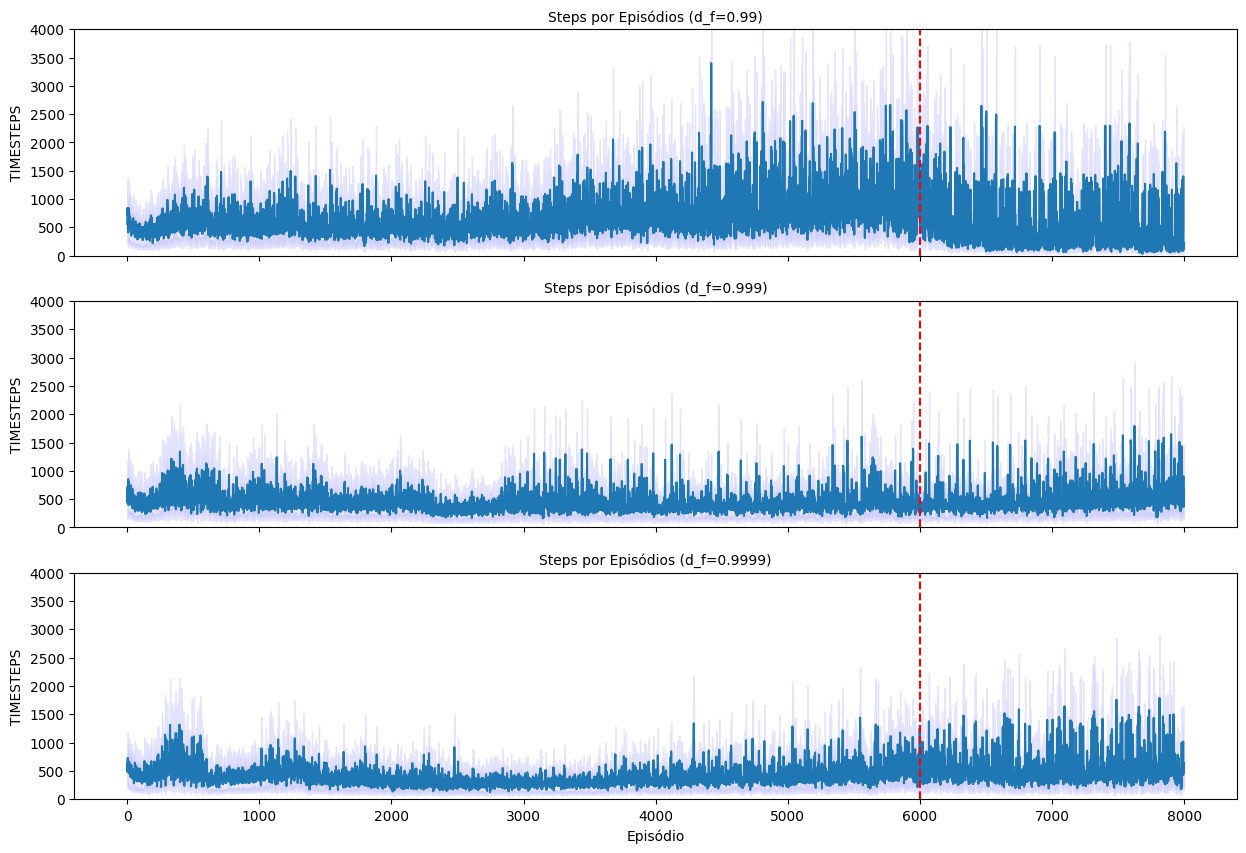

In [124]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_8x8['FILE NAME'][:10], # d_f = 0.99 Conf 0
                     df_summary_8x8['FILE NAME'][10:19], # d_f = 0.999 Conf 1
                     df_summary_8x8['FILE NAME'][19:29]], # d_f = 0.9999 Conf 2
                     ['Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_8x8,
                     range_y=[0,4000],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

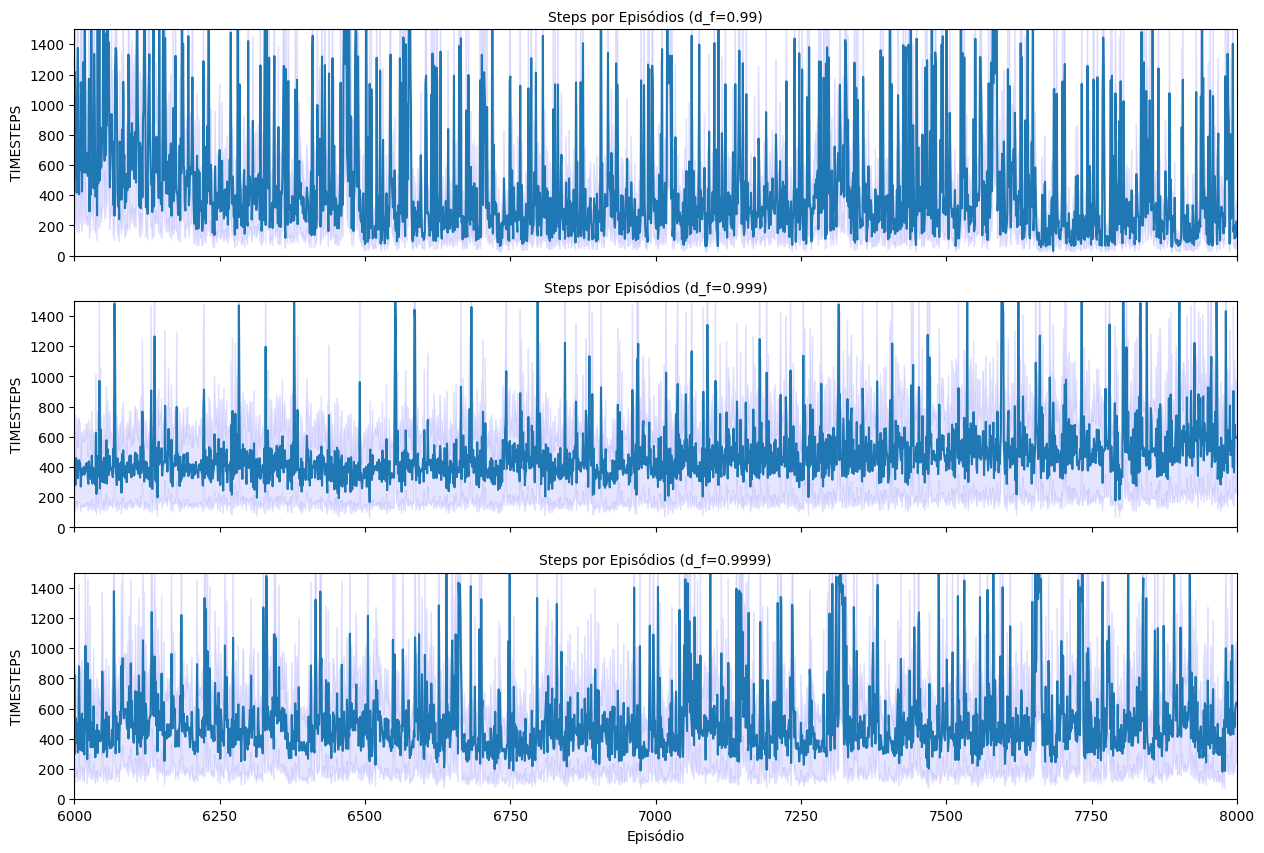

In [136]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_8x8['FILE NAME'][:10], # d_f = 0.99 Conf 0
                     df_summary_8x8['FILE NAME'][10:19], # d_f = 0.999 Conf 1
                     df_summary_8x8['FILE NAME'][19:29]], # d_f = 0.9999 Conf 2
                     ['Steps por Episódios (d_f=0.99)',
                      'Steps por Episódios (d_f=0.999)',
                      'Steps por Episódios (d_f=0.9999)']
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_8x8,
                      range_x=[6000,8000],
                     range_y=[0,1500],
                     vertical_lines=[6000, 6000, 6000, 6000, 6000, 6000]
                     )

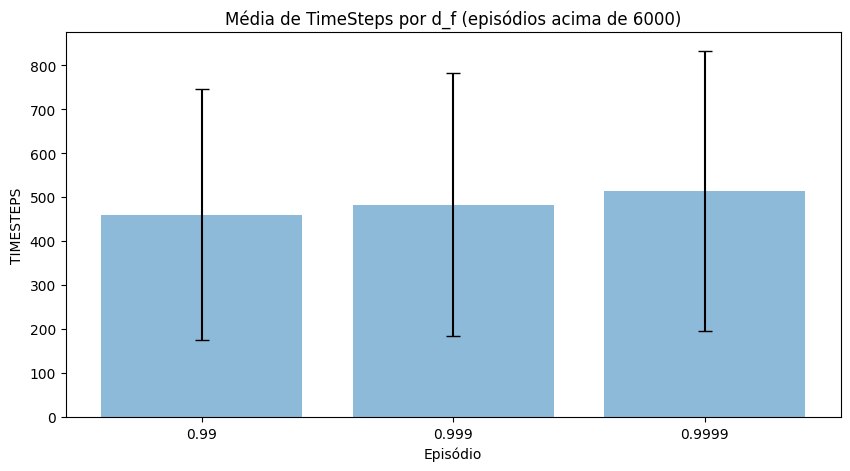

In [137]:
# Análise  da média de timesteps por d_f com intervalo de confiança para acima de 3300 episódios, quando temos convergência em todos os d_f's apesar de se observar instabilidade
# em alguns casos.

plot_means([
            df_summary_8x8['FILE NAME'][:10], # d_f = 0.99 Conf 0
            df_summary_8x8['FILE NAME'][10:19], # d_f = 0.999 Conf 1
            df_summary_8x8['FILE NAME'][19:29]], # d_f = 0.9999 Conf 5
            variable='TIMESTEPS',
            dfs_results=dfs_results_8x8,
            x=['0.99', '0.999', '0.9999'],
            episode_limit = 6000
            )

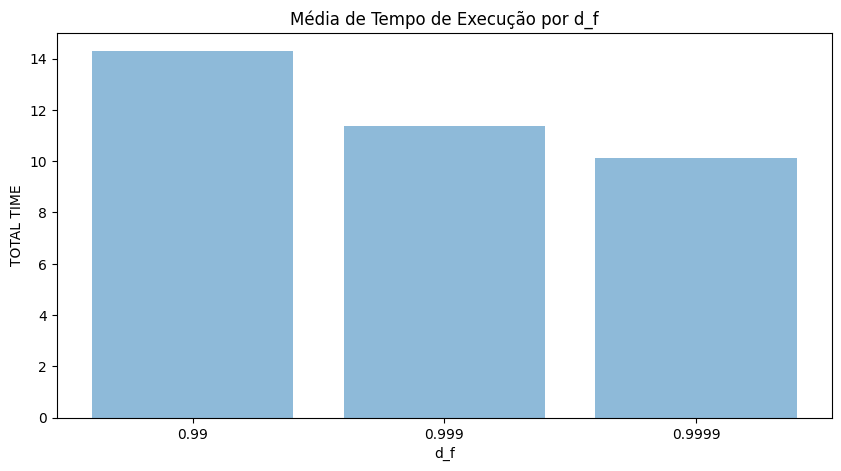

In [31]:
plot_mean_time(df_summary_8x8, 'd_f')

d_f=0.99 foi escolhido pois obteve melhor média para acima de 6.000 episódios, apesar do longo tempo de processamento.

#### 3.3.4. Resultado matrix_complex (13x9)

Devido ao alto tempo de busca por hiperparâmetros, será utilizado mesmo d_f=0.99 da configuração matrix_medium, com dimensão 5x5.

#### 3.4. Análise Gráfica do resultado final por configuração

#### 3.4.1. Resultado matrix_extra_simple (4x3)

In [34]:
# Leitura de soluções e sumarização

dfs_results_4x3_grid = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/01_Analise GridSearch')
dfs_param_4x3_grid = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/01_Analise GridSearch')

donne with:  results_q_learn_dim_4x3_2023-06-03_10-20-30
donne with:  results_q_learn_dim_4x3_2023-06-03_10-22-17
donne with:  results_q_learn_dim_4x3_2023-06-03_10-22-26
donne with:  results_q_learn_dim_4x3_2023-06-03_10-22-44
donne with:  results_q_learn_dim_4x3_2023-06-03_10-23-02
donne with:  results_q_learn_dim_4x3_2023-06-03_10-23-49
donne with:  results_q_learn_dim_4x3_2023-06-03_10-23-50
donne with:  results_q_learn_dim_4x3_2023-06-03_10-24-09
donne with:  results_q_learn_dim_4x3_2023-06-03_10-25-01
donne with:  results_q_learn_dim_4x3_2023-06-03_10-28-18
donne with:  results_q_learn_dim_4x3_2023-06-03_10-57-41
donne with:  results_q_learn_dim_4x3_2023-06-03_10-58-55
donne with:  results_q_learn_dim_4x3_2023-06-03_10-59-28
donne with:  results_q_learn_dim_4x3_2023-06-03_10-59-38
donne with:  results_q_learn_dim_4x3_2023-06-03_11-01-03
donne with:  results_q_learn_dim_4x3_2023-06-03_11-01-52
donne with:  results_q_learn_dim_4x3_2023-06-03_11-02-33
donne with:  results_q_learn_di

In [36]:
df_summary_4x3_grid = create_summary_df(dfs_results_4x3_grid, dfs_param_4x3_grid).sort_values(['lr', 'gamma', 'decay_rate'], ascending=False)
df_summary_4x3_grid

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\3789886665.py:73: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))
C:\Users\Samsu

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-06-03_10-20-30,0.428386,1.548634,1.548634,1.406176,0.040494,0.116406,1.406176,7,7,15.930250,0.100,0.99,0.95,0.010332,1.0,0.01,0.0010,8000.0,7.0
1,results_q_learn_dim_4x3_2023-06-03_10-22-17,0.455963,1.548634,1.548634,1.399684,0.041085,0.110378,1.399684,7,7,16.856750,0.100,0.99,0.95,0.010332,1.0,0.01,0.0010,8000.0,7.0
2,results_q_learn_dim_4x3_2023-06-03_10-22-26,0.458981,1.548634,1.548634,1.400003,0.048140,0.095584,1.400003,7,7,17.011875,0.100,0.99,0.95,0.010332,1.0,0.01,0.0010,8000.0,7.0
3,results_q_learn_dim_4x3_2023-06-03_10-22-44,0.463169,1.548634,1.548634,1.400377,0.048771,0.107964,1.400377,7,7,17.165125,0.100,0.99,0.95,0.010332,1.0,0.01,0.0010,8000.0,7.0
4,results_q_learn_dim_4x3_2023-06-03_10-23-02,0.468117,1.548634,1.548634,1.400771,0.048106,0.109197,1.400771,7,7,17.104000,0.100,0.99,0.95,0.010332,1.0,0.01,0.0010,8000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,results_q_learn_dim_4x3_2023-06-03_14-44-41,0.137587,1.548634,1.548634,1.383645,0.023935,0.047022,1.383645,7,7,11.612250,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
115,results_q_learn_dim_4x3_2023-06-03_14-44-59,0.134537,1.548634,1.548634,1.388888,0.025452,0.047260,1.388888,7,7,11.353125,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
116,results_q_learn_dim_4x3_2023-06-03_14-45-07,0.133617,1.548634,1.548634,1.388398,0.030034,0.045413,1.388398,7,7,11.222375,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
117,results_q_learn_dim_4x3_2023-06-03_14-50-33,0.152896,1.548634,1.471202,1.382285,0.028494,0.047529,1.382285,7,8,13.197750,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,8.0


In [35]:
df_summary_4x3_grid[:10]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
26,results_q_learn_dim_4x3_2023-06-03_10-22-17,0.455963,1.548634,1.548634,1.399684,0.041085,0.110378,1.399684,7,7,16.856750,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
29,results_q_learn_dim_4x3_2023-06-03_10-23-49,0.480112,1.548634,1.548634,1.396081,0.061361,0.099323,1.396081,7,7,17.720875,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
36,results_q_learn_dim_4x3_2023-06-03_10-22-26,0.458981,1.548634,1.548634,1.400003,0.048140,0.095584,1.400003,7,7,17.011875,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
40,results_q_learn_dim_4x3_2023-06-03_10-22-44,0.463169,1.548634,1.548634,1.400377,0.048771,0.107964,1.400377,7,7,17.165125,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
43,results_q_learn_dim_4x3_2023-06-03_10-23-02,0.468117,1.548634,1.548634,1.400771,0.048106,0.109197,1.400771,7,7,17.104000,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
57,results_q_learn_dim_4x3_2023-06-03_10-28-18,0.553402,1.548634,1.397642,1.382202,0.056006,0.125294,1.382202,7,9,20.430500,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,9.0
64,results_q_learn_dim_4x3_2023-06-03_10-20-30,0.428386,1.548634,1.548634,1.406176,0.040494,0.116406,1.406176,7,7,15.930250,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
65,results_q_learn_dim_4x3_2023-06-03_10-24-09,0.487030,1.548634,1.548634,1.397928,0.057400,0.096522,1.397928,7,7,17.926750,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
85,results_q_learn_dim_4x3_2023-06-03_10-25-01,0.500573,1.548634,1.548634,1.392579,0.035753,0.159693,1.392579,7,7,18.392625,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
104,results_q_learn_dim_4x3_2023-06-03_10-23-50,0.481162,1.548634,1.548634,1.400098,0.059524,0.149321,1.400098,7,7,17.839625,0.1,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [36]:
df_summary_4x3_grid[10:20]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
11,results_q_learn_dim_4x3_2023-06-03_10-59-38,0.508058,1.548634,1.548634,1.286123,0.052119,0.088105,1.286123,7,7,21.337500,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
16,results_q_learn_dim_4x3_2023-06-03_11-01-52,0.471873,1.548634,1.548634,1.298504,0.050032,0.124890,1.298504,7,7,20.128125,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
17,results_q_learn_dim_4x3_2023-06-03_11-04-15,0.640307,1.548634,1.548634,1.259718,0.055439,0.095402,1.259718,7,7,26.882250,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
45,results_q_learn_dim_4x3_2023-06-03_11-01-03,0.524515,1.548634,1.548634,1.287555,0.058413,0.100262,1.287555,7,7,21.922375,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
66,results_q_learn_dim_4x3_2023-06-03_10-59-28,0.527358,1.548634,1.548634,1.288281,0.049381,0.103212,1.288281,7,7,22.076250,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
68,results_q_learn_dim_4x3_2023-06-03_10-58-55,0.475269,1.548634,1.548634,1.304944,0.051822,0.113189,1.304944,7,7,19.959125,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
78,results_q_learn_dim_4x3_2023-06-03_10-57-41,0.486964,1.548634,1.548634,1.303684,0.052493,0.091226,1.303684,7,7,20.343250,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
83,results_q_learn_dim_4x3_2023-06-03_11-02-33,0.582681,1.548634,1.548634,1.274999,0.055444,0.103360,1.274999,7,7,24.793125,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
89,results_q_learn_dim_4x3_2023-06-03_11-05-23,0.621884,1.548634,1.548634,1.266538,0.051209,0.112642,1.266538,7,7,25.888000,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
95,results_q_learn_dim_4x3_2023-06-03_11-06-05,0.616327,1.548634,1.548634,1.262273,0.038378,0.125690,1.262273,7,7,25.916625,0.1,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0


In [37]:
df_summary_4x3_grid[20:30]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
2,results_q_learn_dim_4x3_2023-06-03_11-19-17,0.232102,1.548634,1.548634,1.439408,0.047887,0.075321,1.439408,7,7,10.943250,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
5,results_q_learn_dim_4x3_2023-06-03_11-19-13,0.243201,1.548634,1.548634,1.437436,0.050866,0.079083,1.437436,7,7,11.219250,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
9,results_q_learn_dim_4x3_2023-06-03_11-22-48,0.224959,1.548634,1.548634,1.437473,0.041077,0.062972,1.437473,7,7,11.252875,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
14,results_q_learn_dim_4x3_2023-06-03_11-21-17,0.228049,1.548634,1.548634,1.439156,0.043658,0.076001,1.439156,7,7,11.190000,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
27,results_q_learn_dim_4x3_2023-06-03_11-18-12,0.249177,1.548634,1.548634,1.435494,0.050045,0.074108,1.435494,7,7,11.625250,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
46,results_q_learn_dim_4x3_2023-06-03_11-20-23,0.240279,1.548634,1.548634,1.438215,0.048150,0.076851,1.438215,7,7,11.681125,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
49,results_q_learn_dim_4x3_2023-06-03_11-17-35,0.240451,1.548634,1.548634,1.440699,0.050551,0.076475,1.440699,7,7,10.865250,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
50,results_q_learn_dim_4x3_2023-06-03_11-22-12,0.225734,1.548634,1.548634,1.440598,0.047272,0.071119,1.440598,7,7,11.225125,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
87,results_q_learn_dim_4x3_2023-06-03_11-15-37,0.233349,1.548634,1.548634,1.449596,0.046885,0.080344,1.449596,7,7,10.302125,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
117,results_q_learn_dim_4x3_2023-06-03_11-17-50,0.253933,1.548634,1.548634,1.435009,0.046376,0.062969,1.435009,7,7,11.568375,0.1,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [38]:
df_summary_4x3_grid[40:50]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
1,results_q_learn_dim_4x3_2023-06-03_12-29-00,0.875096,1.548634,1.548634,1.340091,0.040270,0.061413,1.340091,7,7,45.031000,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
15,results_q_learn_dim_4x3_2023-06-03_12-13-33,0.658272,1.548634,1.548634,1.366459,0.034968,0.065056,1.366459,7,7,34.389250,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
35,results_q_learn_dim_4x3_2023-06-03_12-16-39,0.600333,1.548634,1.548634,1.371207,0.039369,0.076617,1.371207,7,7,31.869000,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
41,results_q_learn_dim_4x3_2023-06-03_11-59-26,0.303834,1.548634,1.548634,1.444716,0.042779,0.075804,1.444716,7,7,16.482750,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
51,results_q_learn_dim_4x3_2023-06-03_12-17-31,0.686139,1.548634,1.548634,1.373346,0.027443,0.069586,1.373346,7,7,35.606625,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
56,results_q_learn_dim_4x3_2023-06-03_12-35-43,0.961201,1.548634,1.548634,1.336958,0.039269,0.067482,1.336958,7,7,48.433250,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
72,results_q_learn_dim_4x3_2023-06-03_12-35-38,0.995334,1.548634,1.548634,1.326297,0.036777,0.057714,1.326297,7,7,50.295250,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
86,results_q_learn_dim_4x3_2023-06-03_12-40-10,1.010149,1.548634,1.548634,1.326598,0.034577,0.079508,1.326598,7,7,51.404125,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
96,results_q_learn_dim_4x3_2023-06-03_12-29-04,0.853039,1.548634,1.548634,1.352965,0.022513,0.061347,1.352965,7,7,43.701125,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
112,results_q_learn_dim_4x3_2023-06-03_11-50-59,0.204801,1.548634,1.548634,1.459749,0.033872,0.059199,1.459749,7,7,11.247250,0.01,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [39]:
df_summary_4x3_grid[50:60]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_4x3_2023-06-03_13-17-17,0.754482,1.548634,1.548634,1.236027,0.036023,0.075762,1.236027,7,7,40.823250,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
8,results_q_learn_dim_4x3_2023-06-03_12-37-49,0.591525,1.548634,1.548634,1.273009,0.030786,0.050474,1.273009,7,7,33.398000,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
21,results_q_learn_dim_4x3_2023-06-03_12-38-18,0.297446,1.548634,1.548634,1.355571,0.036898,0.079173,1.355571,7,7,17.833125,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
25,results_q_learn_dim_4x3_2023-06-03_12-10-56,0.285698,1.548634,1.548634,1.346260,0.033945,0.069346,1.346260,7,7,18.136250,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
31,results_q_learn_dim_4x3_2023-06-03_12-57-13,0.627815,1.548634,1.471202,1.262268,0.028760,0.059652,1.262268,7,8,35.129125,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,8.0
42,results_q_learn_dim_4x3_2023-06-03_13-22-36,0.733701,1.548634,1.548634,1.242190,0.030928,0.074118,1.242190,7,7,40.245625,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
75,results_q_learn_dim_4x3_2023-06-03_13-16-03,0.623098,1.548634,1.548634,1.254397,0.034578,0.076710,1.254397,7,7,35.056000,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
94,results_q_learn_dim_4x3_2023-06-03_12-49-39,0.552828,1.548634,1.548634,1.277913,0.034926,0.061166,1.277913,7,7,31.085875,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
100,results_q_learn_dim_4x3_2023-06-03_13-19-41,0.609553,1.548634,1.548634,1.253589,0.030275,0.065026,1.253589,7,7,34.235250,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
108,results_q_learn_dim_4x3_2023-06-03_13-13-50,0.698003,1.548634,1.548634,1.255244,0.030577,0.071724,1.255244,7,7,38.230875,0.01,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0


In [40]:
df_summary_4x3_grid[60:69]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
24,results_q_learn_dim_4x3_2023-06-03_12-54-47,0.226583,1.548634,1.548634,1.445132,0.037295,0.050759,1.445132,7,7,12.500500,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
30,results_q_learn_dim_4x3_2023-06-03_13-41-39,0.267115,1.548634,1.548634,1.451379,0.043896,0.066652,1.451379,7,7,13.731625,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
34,results_q_learn_dim_4x3_2023-06-03_12-30-22,0.275563,1.548634,1.548634,1.449504,0.040255,0.063571,1.449504,7,7,14.616500,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
59,results_q_learn_dim_4x3_2023-06-03_13-06-54,0.238974,1.548634,1.548634,1.447407,0.040976,0.072237,1.447407,7,7,12.981375,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
63,results_q_learn_dim_4x3_2023-06-03_13-34-09,0.288663,1.548634,1.548634,1.449717,0.036087,0.070837,1.449717,7,7,14.677000,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
76,results_q_learn_dim_4x3_2023-06-03_13-38-32,0.263859,1.548634,1.548634,1.442205,0.042117,0.079504,1.442205,7,7,14.116750,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
79,results_q_learn_dim_4x3_2023-06-03_13-40-01,0.349178,1.548634,1.471202,1.425866,0.041563,0.078640,1.425866,7,8,17.665875,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,8.0
91,results_q_learn_dim_4x3_2023-06-03_13-36-38,0.272263,1.548634,1.548634,1.439898,0.035621,0.071758,1.439898,7,7,14.226500,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
92,results_q_learn_dim_4x3_2023-06-03_13-20-31,0.338934,1.548634,1.548634,1.448585,0.032985,0.070242,1.448585,7,7,17.213875,0.01,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [41]:
df_summary_4x3_grid[69:79]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
4,results_q_learn_dim_4x3_2023-06-03_13-56-21,0.280351,1.548634,1.548634,1.364030,0.036361,0.046925,1.364030,7,7,16.566750,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
13,results_q_learn_dim_4x3_2023-06-03_13-16-48,0.277758,1.548634,1.548634,1.361198,0.027652,0.072970,1.361198,7,7,16.316125,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
23,results_q_learn_dim_4x3_2023-06-03_13-26-39,0.279467,1.548634,1.471202,1.363671,0.034675,0.075330,1.363671,7,8,16.320500,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,8.0
44,results_q_learn_dim_4x3_2023-06-03_12-50-56,0.294397,1.548634,1.548634,1.349738,0.036411,0.059415,1.349738,7,7,17.611625,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
53,results_q_learn_dim_4x3_2023-06-03_13-56-54,0.330678,1.548634,1.548634,1.346537,0.037048,0.054545,1.346537,7,7,19.432250,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
58,results_q_learn_dim_4x3_2023-06-03_13-41-53,0.306139,1.548634,1.548634,1.349671,0.038373,0.067676,1.349671,7,7,17.789375,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
60,results_q_learn_dim_4x3_2023-06-03_13-14-25,0.278405,1.548634,1.548634,1.358632,0.037325,0.071046,1.358632,7,7,16.670500,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
69,results_q_learn_dim_4x3_2023-06-03_13-58-53,0.291605,1.548634,1.548634,1.355132,0.030312,0.063797,1.355132,7,7,17.748500,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
73,results_q_learn_dim_4x3_2023-06-03_14-02-25,0.298577,1.548634,1.548634,1.350807,0.029417,0.075657,1.350807,7,7,18.163625,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
118,results_q_learn_dim_4x3_2023-06-03_14-01-43,0.313664,1.548634,1.548634,1.356618,0.037257,0.073269,1.356618,7,7,18.679000,0.01,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0


In [42]:
df_summary_4x3_grid[79:89]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
6,results_q_learn_dim_4x3_2023-06-03_14-09-39,0.165322,1.548634,1.548634,1.465730,0.035677,0.069305,1.465730,7,7,9.124750,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
20,results_q_learn_dim_4x3_2023-06-03_13-03-58,0.168829,1.548634,1.548634,1.465152,0.021791,0.064870,1.465152,7,7,9.290250,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
33,results_q_learn_dim_4x3_2023-06-03_14-09-16,0.168024,1.548634,1.548634,1.464068,0.029190,0.081983,1.464068,7,7,9.342250,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
67,results_q_learn_dim_4x3_2023-06-03_14-11-43,0.166730,1.548634,1.548634,1.464460,0.037813,0.066184,1.464460,7,7,9.218125,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
80,results_q_learn_dim_4x3_2023-06-03_13-57-04,0.205491,1.548634,1.548634,1.462163,0.028325,0.064398,1.462163,7,7,11.086250,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
90,results_q_learn_dim_4x3_2023-06-03_13-30-16,0.174627,1.548634,1.548634,1.465045,0.033421,0.072761,1.465045,7,7,9.228875,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
102,results_q_learn_dim_4x3_2023-06-03_14-15-48,0.188365,1.548634,1.548634,1.462231,0.032921,0.057116,1.462231,7,7,10.399375,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
107,results_q_learn_dim_4x3_2023-06-03_14-15-03,0.163868,1.548634,1.548634,1.466049,0.031672,0.073267,1.466049,7,7,9.153750,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
110,results_q_learn_dim_4x3_2023-06-03_13-29-49,0.207168,1.548634,1.548634,1.460564,0.026036,0.072638,1.460564,7,7,10.820000,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
115,results_q_learn_dim_4x3_2023-06-03_13-40-18,0.177551,1.548634,1.548634,1.463401,0.037977,0.069558,1.463401,7,7,9.327875,0.001,0.99,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [43]:
df_summary_4x3_grid[89:99]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
22,results_q_learn_dim_4x3_2023-06-03_14-28-06,0.162749,1.548634,1.548634,1.384647,0.026184,0.064408,1.384647,7,7,11.470250,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
28,results_q_learn_dim_4x3_2023-06-03_14-24-13,0.198523,1.548634,1.548634,1.377907,0.029433,0.055977,1.377907,7,7,13.131125,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
38,results_q_learn_dim_4x3_2023-06-03_14-23-46,0.197339,1.548634,1.548634,1.380559,0.029937,0.064998,1.380559,7,7,12.852500,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
47,results_q_learn_dim_4x3_2023-06-03_14-24-28,0.168817,1.548634,1.548634,1.386867,0.030200,0.050275,1.386867,7,7,11.420625,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
74,results_q_learn_dim_4x3_2023-06-03_13-17-59,0.184796,1.548634,1.548634,1.390744,0.030194,0.065750,1.390744,7,7,11.259625,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
77,results_q_learn_dim_4x3_2023-06-03_13-55-56,0.212307,1.548634,1.548634,1.378440,0.028921,0.069999,1.378440,7,7,12.810500,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
101,results_q_learn_dim_4x3_2023-06-03_14-29-18,0.195394,1.548634,1.548634,1.380575,0.031929,0.070080,1.380575,7,7,13.423875,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
105,results_q_learn_dim_4x3_2023-06-03_14-10-43,0.180098,1.548634,1.548634,1.388977,0.035529,0.054229,1.388977,7,7,11.255500,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
106,results_q_learn_dim_4x3_2023-06-03_13-44-54,0.194048,1.548634,1.548634,1.387010,0.038241,0.064079,1.387010,7,7,11.500375,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
116,results_q_learn_dim_4x3_2023-06-03_13-44-18,0.191529,1.548634,1.548634,1.385826,0.039259,0.078503,1.385826,7,7,11.385250,0.001,0.99,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0


In [44]:
df_summary_4x3_grid[99:109]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
3,results_q_learn_dim_4x3_2023-06-03_14-34-54,0.135183,1.548634,1.548634,1.466623,0.026381,0.052814,1.466623,7,7,9.329250,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-06-03_14-41-56,0.192776,1.548634,1.548634,1.458030,0.025121,0.050097,1.458030,7,7,13.375875,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
18,results_q_learn_dim_4x3_2023-06-03_14-39-18,0.128975,1.548634,1.548634,1.466884,0.029895,0.047232,1.466884,7,7,9.077125,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
54,results_q_learn_dim_4x3_2023-06-03_14-34-14,0.135058,1.548634,1.548634,1.465603,0.029580,0.062696,1.465603,7,7,9.180375,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
70,results_q_learn_dim_4x3_2023-06-03_13-57-42,0.166014,1.548634,1.548634,1.466037,0.038677,0.055172,1.466037,7,7,9.194000,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
93,results_q_learn_dim_4x3_2023-06-03_14-08-54,0.168804,1.548634,1.548634,1.463607,0.036965,0.070209,1.463607,7,7,9.396250,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
97,results_q_learn_dim_4x3_2023-06-03_14-34-43,0.135821,1.548634,1.548634,1.462991,0.026182,0.058948,1.462991,7,7,9.358750,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
109,results_q_learn_dim_4x3_2023-06-03_14-22-41,0.154938,1.548634,1.548634,1.467069,0.028566,0.058870,1.467069,7,7,9.158625,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
113,results_q_learn_dim_4x3_2023-06-03_13-33-36,0.210723,1.548634,1.548634,1.460419,0.043807,0.076046,1.460419,7,7,10.951000,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0
114,results_q_learn_dim_4x3_2023-06-03_14-11-36,0.407293,1.548634,1.548634,1.418980,0.035232,0.060018,1.418980,7,7,21.694625,0.001,0.95,0.95,0.010332,1.0,0.01,0.001,8000.0,7.0


In [45]:
df_summary_4x3_grid[109:119]

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
12,results_q_learn_dim_4x3_2023-06-03_13-48-00,0.190513,1.548634,1.548634,1.388678,0.038130,0.063867,1.388678,7,7,11.361750,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
32,results_q_learn_dim_4x3_2023-06-03_14-24-25,0.169749,1.548634,1.548634,1.382832,0.033682,0.067658,1.382832,7,7,11.595125,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
37,results_q_learn_dim_4x3_2023-06-03_14-34-03,0.149943,1.548634,1.548634,1.385699,0.032433,0.049071,1.385699,7,7,11.466625,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
39,results_q_learn_dim_4x3_2023-06-03_14-22-06,0.175233,1.548634,1.548634,1.383230,0.030188,0.070777,1.383230,7,7,11.570250,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
55,results_q_learn_dim_4x3_2023-06-03_14-50-33,0.152896,1.548634,1.471202,1.382285,0.028494,0.047529,1.382285,7,8,13.197750,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,8.0
61,results_q_learn_dim_4x3_2023-06-03_14-44-41,0.137587,1.548634,1.548634,1.383645,0.023935,0.047022,1.383645,7,7,11.612250,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
62,results_q_learn_dim_4x3_2023-06-03_14-11-35,0.183952,1.548634,1.548634,1.383826,0.028614,0.060700,1.383826,7,7,11.552000,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
71,results_q_learn_dim_4x3_2023-06-03_14-45-07,0.133617,1.548634,1.548634,1.388398,0.030034,0.045413,1.388398,7,7,11.222375,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
99,results_q_learn_dim_4x3_2023-06-03_14-51-31,0.125984,1.548634,1.548634,1.387094,0.025159,0.043733,1.387094,7,7,11.482500,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0
111,results_q_learn_dim_4x3_2023-06-03_14-44-59,0.134537,1.548634,1.548634,1.388888,0.025452,0.047260,1.388888,7,7,11.353125,0.001,0.95,0.95,0.028142,1.0,0.01,0.0005,8000.0,7.0


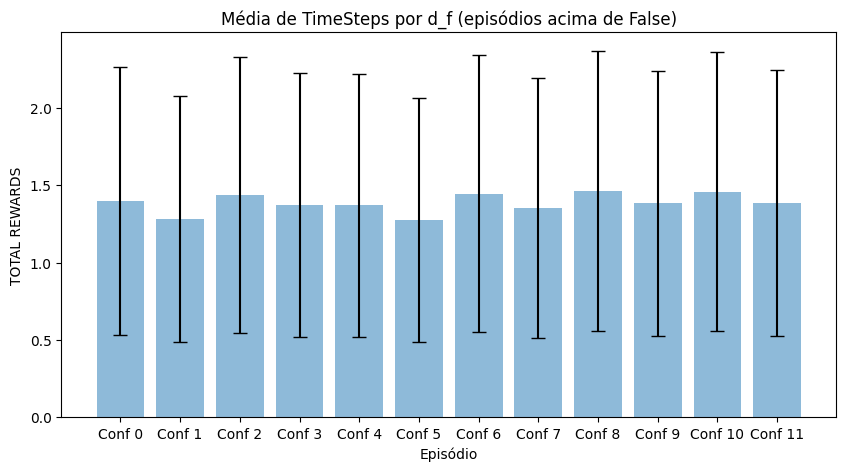

In [42]:
plot_means([df_summary_4x3_grid[:10]['FILE NAME'],
            df_summary_4x3_grid[10:20]['FILE NAME'],
            df_summary_4x3_grid[20:30]['FILE NAME'],
            df_summary_4x3_grid[30:40]['FILE NAME'],
            df_summary_4x3_grid[40:50]['FILE NAME'],
            df_summary_4x3_grid[50:60]['FILE NAME'],
            df_summary_4x3_grid[60:69]['FILE NAME'],
            df_summary_4x3_grid[69:79]['FILE NAME'],
            df_summary_4x3_grid[79:89]['FILE NAME'],
            df_summary_4x3_grid[89:99]['FILE NAME'],
            df_summary_4x3_grid[99:109]['FILE NAME'],
            df_summary_4x3_grid[109:119]['FILE NAME']],
            variable='TOTAL REWARDS',
            dfs_results=dfs_results_4x3_grid,
            x=['Conf 0',
               'Conf 1', 
               'Conf 2', 
               'Conf 3', 
               'Conf 4', 
               'Conf 5', 
               'Conf 6', 
               'Conf 7', 
               'Conf 8', 
               'Conf 9', 
               'Conf 10', 
               'Conf 11'],
            episode_limit = False
            )

* Conf 0 (lr=0.1, gamma=0.99, epsilon_decay_rate=0.001)
* Conf 1 (lr=0.1, gamma=0.99, epsilon_decay_rate=0.005)
* Conf 2 (lr=0.1, gamma=0.95, epsilon_decay_rate=0.001)
* Conf 3 (lr=0.1, gamma=0.95, epsilon_decay_rate=0.005)
* Conf 4 (lr=0.01, gamma=0.99, epsilon_decay_rate=0.001)
* Conf 5 (lr=0.01, gamma=0.99, epsilon_decay_rate=0.005)
* Conf 6 (lr=0.01, gamma=0.95, epsilon_decay_rate=0.001)
* Conf 7 (lr=0.01, gamma=0.95, epsilon_decay_rate=0.005)
* Conf 8 (lr=0.001, gamma=0.99, epsilon_decay_rate=0.001)
* Conf 9 (lr=0.001, gamma=0.99, epsilon_decay_rate=0.005)
* Conf 10 (lr=0.001, gamma=0.95, epsilon_decay_rate=0.001)
* Conf 11 (lr=0.001, gamma=0.95, epsilon_decay_rate=0.005)

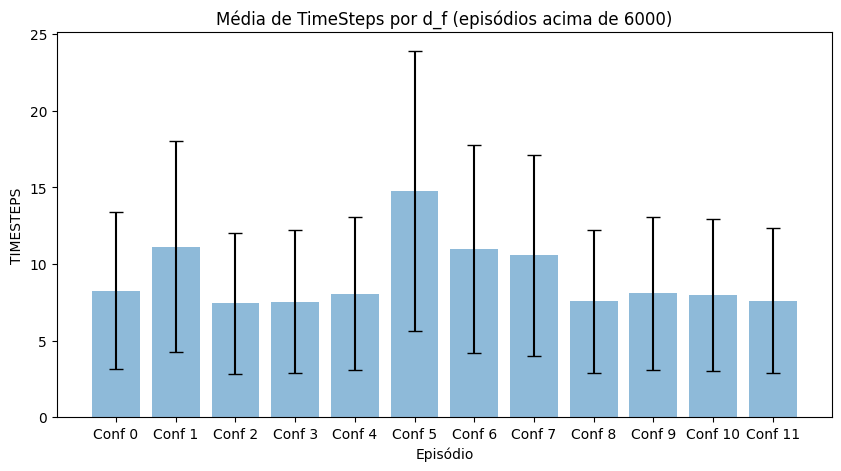

In [45]:
plot_means([df_summary_4x3_grid[:10]['FILE NAME'],
            df_summary_4x3_grid[10:20]['FILE NAME'],
            df_summary_4x3_grid[20:30]['FILE NAME'],
            df_summary_4x3_grid[30:40]['FILE NAME'],
            df_summary_4x3_grid[40:50]['FILE NAME'],
            df_summary_4x3_grid[50:60]['FILE NAME'],
            df_summary_4x3_grid[60:69]['FILE NAME'],
            df_summary_4x3_grid[69:79]['FILE NAME'],
            df_summary_4x3_grid[79:89]['FILE NAME'],
            df_summary_4x3_grid[89:99]['FILE NAME'],
            df_summary_4x3_grid[99:109]['FILE NAME'],
            df_summary_4x3_grid[109:119]['FILE NAME']],
            variable='TIMESTEPS',
            dfs_results=dfs_results_4x3_grid,
            x=['Conf 0', 'Conf 1', 'Conf 2', 'Conf 3', 'Conf 4', 'Conf 5', 'Conf 6', 'Conf 7', 'Conf 8', 'Conf 9', 'Conf 10', 'Conf 11'],
            episode_limit = 6000
            )

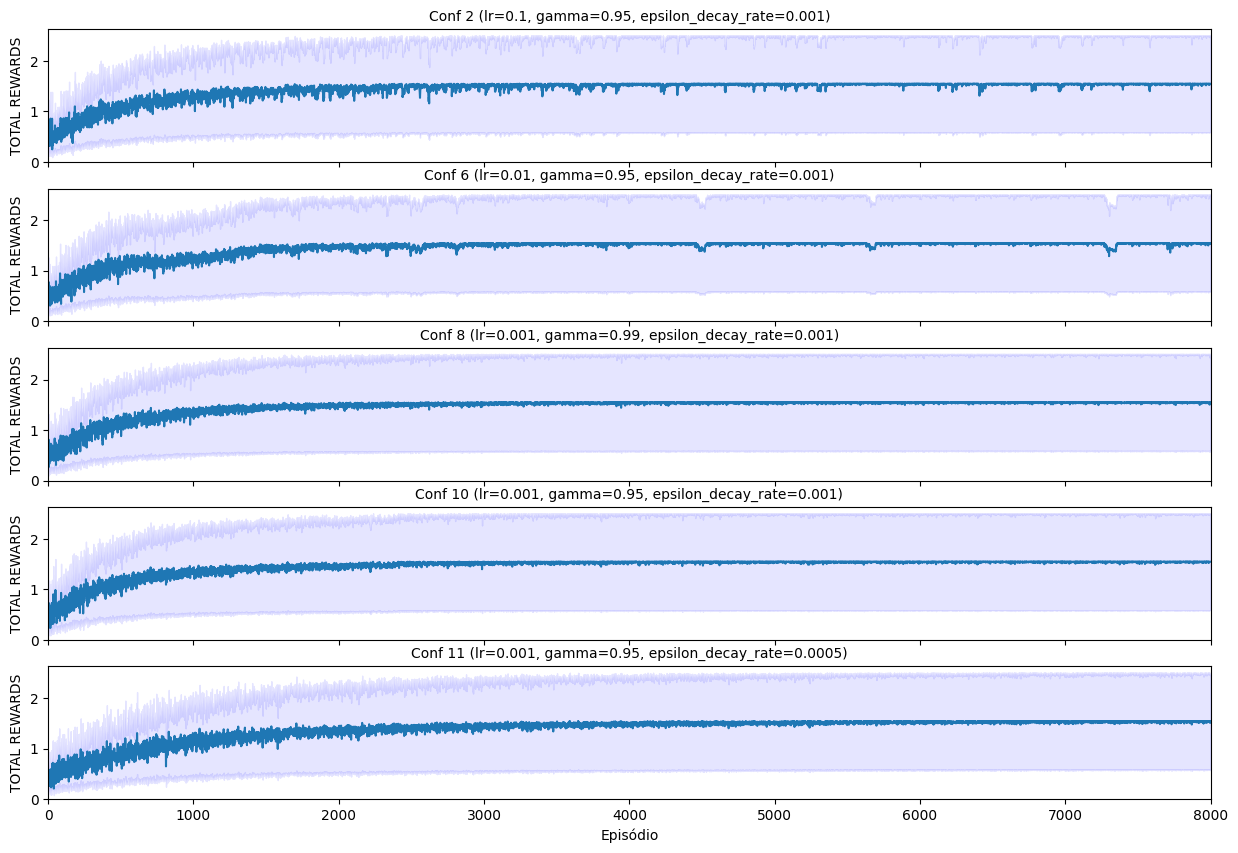

In [43]:
# Análise de timesteps por episódio, variando o d_f. É interessante a análise tanto da convergência quando da estabilidade da solução.

plot_episodes_multi_subplots([df_summary_4x3_grid[20:30]['FILE NAME'],
                                df_summary_4x3_grid[60:69]['FILE NAME'],
                                df_summary_4x3_grid[79:89]['FILE NAME'],
                                df_summary_4x3_grid[99:109]['FILE NAME'],
                                df_summary_4x3_grid[109:119]['FILE NAME']], # d_f = 0.9999 Conf 5
                     ['Conf 2 (lr=0.1, gamma=0.95, epsilon_decay_rate=0.001)',
                      'Conf 6 (lr=0.01, gamma=0.95, epsilon_decay_rate=0.001)',
                      'Conf 8 (lr=0.001, gamma=0.99, epsilon_decay_rate=0.001)',
                      'Conf 10 (lr=0.001, gamma=0.95, epsilon_decay_rate=0.001)',
                      'Conf 11 (lr=0.001, gamma=0.95, epsilon_decay_rate=0.0005)']
                     ,
                     variable='TOTAL REWARDS',
                     dfs_results=dfs_results_4x3_grid,
                     range_y=False,
                     range_x=[0,8000],
                     vertical_lines=False)

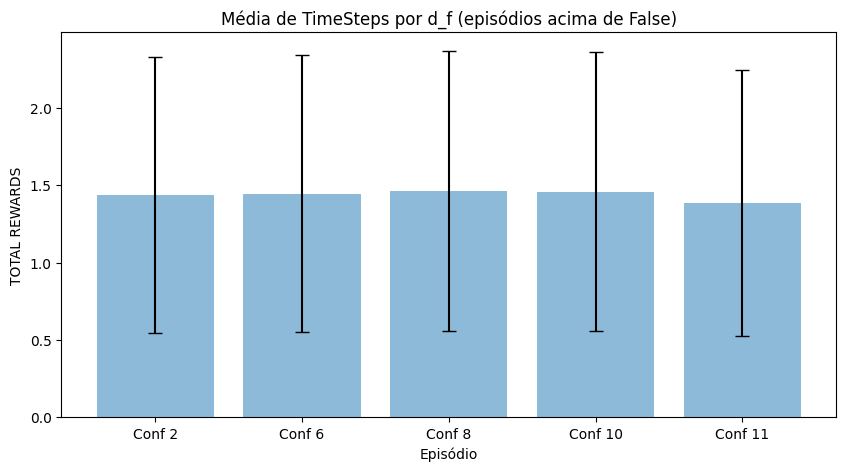

In [46]:
plot_means([df_summary_4x3_grid[20:30]['FILE NAME'],
            df_summary_4x3_grid[60:69]['FILE NAME'],
            df_summary_4x3_grid[79:89]['FILE NAME'],
            df_summary_4x3_grid[99:109]['FILE NAME'],
            df_summary_4x3_grid[109:119]['FILE NAME']],
            variable='TOTAL REWARDS',
            dfs_results=dfs_results_4x3_grid,
            x=['Conf 2', 'Conf 6', 'Conf 8', 'Conf 10', 'Conf 11'],
            episode_limit = False
            )

Configuração escolhida: Conf 8 (lr=0.001, gamma=0.99, epsilon_decay_rate=0.001)

In [95]:
def select_best_result(df_summary, dict_results, lr, gamma, epsilon_decay_rate):

    df_summary = df_summary[df_summary['lr']==lr][df_summary['gamma']==gamma][df_summary['decay_rate']==epsilon_decay_rate]
    file_name = str(df_summary.sort_values('AVG REWARD TIME').sort_values('AVG REWARD', ascending=False).sort_values('MAX REWARD', ascending=False).sort_values('MAX REWARD TIMESTEPS')['FILE NAME'].iloc[0])
    max_reward = str(df_summary.sort_values('AVG REWARD TIME').sort_values('AVG REWARD', ascending=False).sort_values('MAX REWARD', ascending=False).sort_values('MAX REWARD TIMESTEPS')['MAX REWARD'].iloc[0])
    time_steps = str(df_summary.sort_values('AVG REWARD TIME').sort_values('AVG REWARD', ascending=False).sort_values('MAX REWARD', ascending=False).sort_values('MAX REWARD TIMESTEPS')['MAX REWARD TIMESTEPS'].iloc[0])


    df_results = dict_results[file_name]

    return pd.DataFrame(eval(df_results[df_results['TIMESTEPS']==int(time_steps)][df_results['TOTAL REWARDS']==round(float(max_reward), 15)].sort_values('JOGO', ascending=False).iloc[0]['Vtable']))

C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\2364279986.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_summary = df_summary[df_summary['lr']==lr][df_summary['gamma']==gamma][df_summary['decay_rate']==epsilon_decay_rate]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\2364279986.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_summary = df_summary[df_summary['lr']==lr][df_summary['gamma']==gamma][df_summary['decay_rate']==epsilon_decay_rate]
C:\Users\Samsung\AppData\Local\Temp\ipykernel_14820\2364279986.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return pd.DataFrame(eval(df_results[df_results['TIMESTEPS']==int(time_steps)][df_results['TOTAL REWARDS']==round(float(max_reward), 15)].sort_values('JOGO', ascending=False).iloc[0]['Vtable']))


legal paths:  [('down',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1)]
recompensas:  [0.0]
recompensas com fator temporal:  [0.0]
legal paths:  [('down',), ('right',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (1, 1)]
recompensas:  [0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0]
legal paths:  [('left',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1), (1, 1), (1, 2)]
recompensas:  [0.0, 0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0, 0.0]
legal paths:  [('up',), ('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994]
legal paths:  [('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5, 0.9]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994, 0.696402843

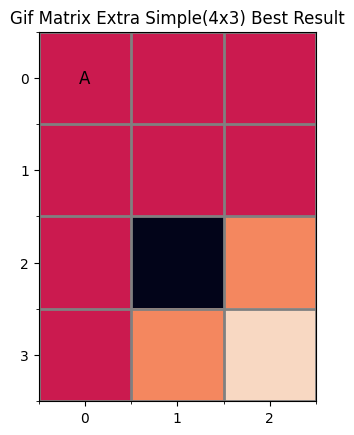

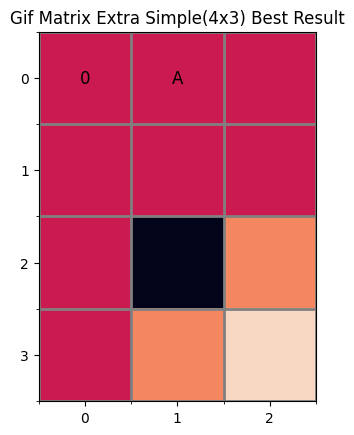

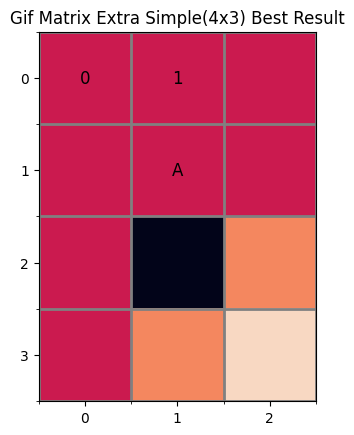

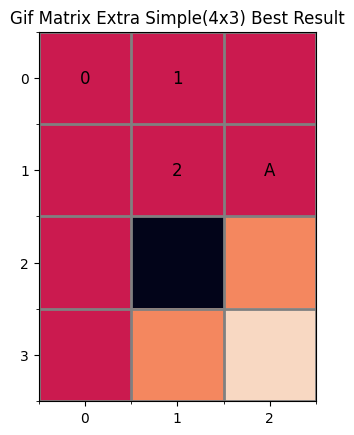

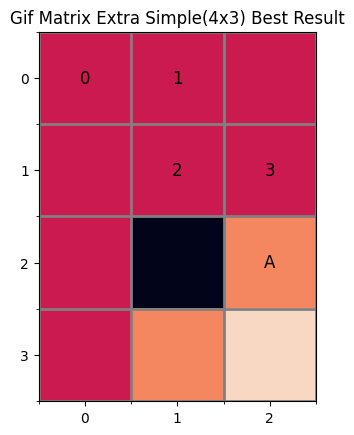

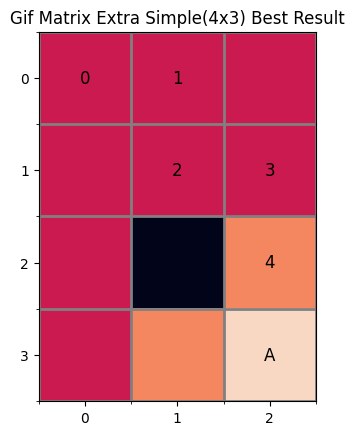

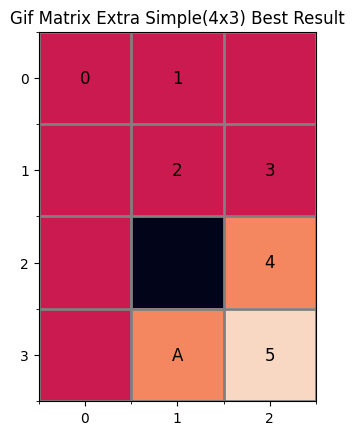

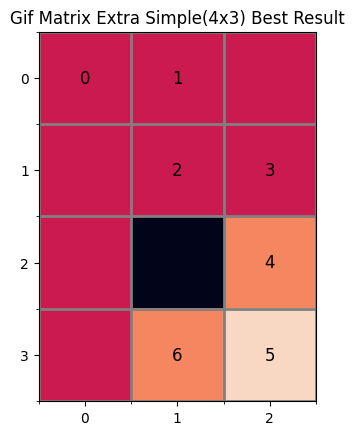

In [104]:
#

matrix = matrix_extra_simple
duration = 3
title = 'Gif Matrix Extra Simple(4x3) Best Result'

if __name__ == "__main__":
    game = Play(matrix_game = matrix,
                vtable = select_best_result(df_summary_4x3_grid,
                                            dfs_results_4x3_grid,
                                            lr = 0.001,
                                            gamma = 0.99,
                                            epsilon_decay_rate = 0.001),
                start = (0, 0),
                d_f = 0.95
                )
    game.play_game()

    create_gif(matrix, game.states, duration, title)

#### 3.4.2. Resultado matrix_simple (5x5)

In [50]:
# Leitura de soluções e sumarização

dfs_results_5x5_grid = read_results('Resultado_RL_Q_Learning/01_Matriz Simple_5x5/01_Analise GridSearch')
dfs_param_5x5_grid = read_parameters('Resultado_RL_Q_Learning/01_Matriz Simple_5x5/01_Analise GridSearch')

donne with:  results_q_learn_dim_5x5_2023-06-07_16-03-04
donne with:  results_q_learn_dim_5x5_2023-06-07_14-23-23
donne with:  results_q_learn_dim_5x5_2023-06-07_12-04-56
donne with:  results_q_learn_dim_5x5_2023-06-07_12-24-08
donne with:  results_q_learn_dim_5x5_2023-06-07_16-27-22
donne with:  results_q_learn_dim_5x5_2023-06-07_14-29-55
donne with:  results_q_learn_dim_5x5_2023-06-07_16-18-57
donne with:  results_q_learn_dim_5x5_2023-06-07_12-28-58
donne with:  results_q_learn_dim_5x5_2023-06-07_11-40-20
donne with:  results_q_learn_dim_5x5_2023-06-07_14-54-13
donne with:  results_q_learn_dim_5x5_2023-06-07_15-43-56
donne with:  results_q_learn_dim_5x5_2023-06-07_12-15-54
donne with:  results_q_learn_dim_5x5_2023-06-07_11-54-27
donne with:  results_q_learn_dim_5x5_2023-06-07_16-38-38
donne with:  results_q_learn_dim_5x5_2023-06-07_14-43-18
donne with:  results_q_learn_dim_5x5_2023-06-07_14-16-05
donne with:  results_q_learn_dim_5x5_2023-06-07_12-07-48
donne with:  results_q_learn_di

In [51]:
df_summary_5x5_grid = create_summary_df(dfs_results_5x5_grid, dfs_param_5x5_grid).sort_values(['lr', 'gamma', 'decay_rate'], ascending=False)
df_summary_5x5_grid

,FILE NAME,TOTAL TIME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
2,results_q_learn_dim_5x5_2023-06-07_12-04-56,1.756744,1.223664,1.142414,0.909065,0.165739,0.215035,0.909065,15,13,78.057000,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
3,results_q_learn_dim_5x5_2023-06-07_12-24-08,2.069661,1.223664,1.142414,0.913073,0.205043,0.174835,0.913073,15,13,89.718500,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
7,results_q_learn_dim_5x5_2023-06-07_12-28-58,2.152621,1.144850,1.118254,0.862877,1.669644,0.179603,0.862877,129,13,92.311000,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
8,results_q_learn_dim_5x5_2023-06-07_11-40-20,1.353438,1.223664,1.142414,0.895597,0.172462,0.190965,0.895597,15,13,63.628625,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
11,results_q_learn_dim_5x5_2023-06-07_12-15-54,1.932225,1.223664,1.147019,0.892993,0.143976,0.189025,0.892993,15,13,84.794625,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
12,results_q_learn_dim_5x5_2023-06-07_11-54-27,1.581710,1.223664,1.142414,0.915270,0.141687,0.237629,0.915270,15,13,72.543125,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
16,results_q_learn_dim_5x5_2023-06-07_12-07-48,1.804213,1.223664,1.142414,0.912508,0.157498,0.193031,0.912508,15,13,76.919250,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0
20,results_q_learn_dim_5x5_2023-06-07_12-08-25,1.805862,1.204337,0.731145,0.905631,0.216471,0.228401,0.905631,15,15,80.349125,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,15.0
30,results_q_learn_dim_5x5_2023-06-07_12-13-21,1.891681,1.223664,1.196176,0.912591,0.171623,63.432298,0.912591,15,4484,84.010750,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,4484.0
31,results_q_learn_dim_5x5_2023-06-07_11-47-13,1.464418,1.185439,1.142414,0.908146,2.776821,0.195673,0.908146,263,13,69.146625,0.010,0.99,0.8,0.010332,1.0,0.01,0.0010,8000.0,13.0


#### 3.4.3. Resultado matrix_medium (8x8)

#### 3.4.4. Resultado matrix_complex (13x9)

#### 3.5. Criação de Gif para as Melhores Soluções de Cada Configuração

#### 3.5.1. Resultado matrix_extra_simple (4x3)

#### 3.5.2. Resultado matrix_simple (5x5)

#### 3.5.3. Resultado matrix_medium (8x8)

#### 3.5.4. Resultado matrix_complex (13x9)